In [1]:
### Imports (TODO remove this when finished)
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../")

import nidn

17:01:09|NIDN-INFO| Initialized NIDN for cpu
17:01:09|NIDN-INFO| Using double precision


# Single layer , uniform, regression

Physical wavelengths are (in meters):
[1.00000000e-05 9.67687890e-06 9.36419852e-06 9.06162150e-06
 8.76882139e-06 8.48548227e-06 8.21129843e-06 7.94597405e-06
 7.68922286e-06 7.44076784e-06 7.20034093e-06 6.96768272e-06
 6.74254219e-06 6.52467642e-06 6.31385036e-06 6.10983653e-06
 5.91241481e-06 5.72137222e-06 5.53650261e-06 5.35760652e-06
 5.18449095e-06 5.01696911e-06 4.85486025e-06 4.69798947e-06
 4.54618751e-06 4.39929060e-06 4.25714024e-06 4.11958305e-06
 3.98647063e-06 3.85765935e-06 3.73301024e-06 3.61238880e-06
 3.49566489e-06 3.38271258e-06 3.27341000e-06 3.16763922e-06
 3.06528611e-06 2.96624025e-06 2.87039476e-06 2.77764625e-06
 2.68789464e-06 2.60104309e-06 2.51699790e-06 2.43566839e-06
 2.35696680e-06 2.28080823e-06 2.20711050e-06 2.13579411e-06
 2.06678209e-06 2.00000000e-06]


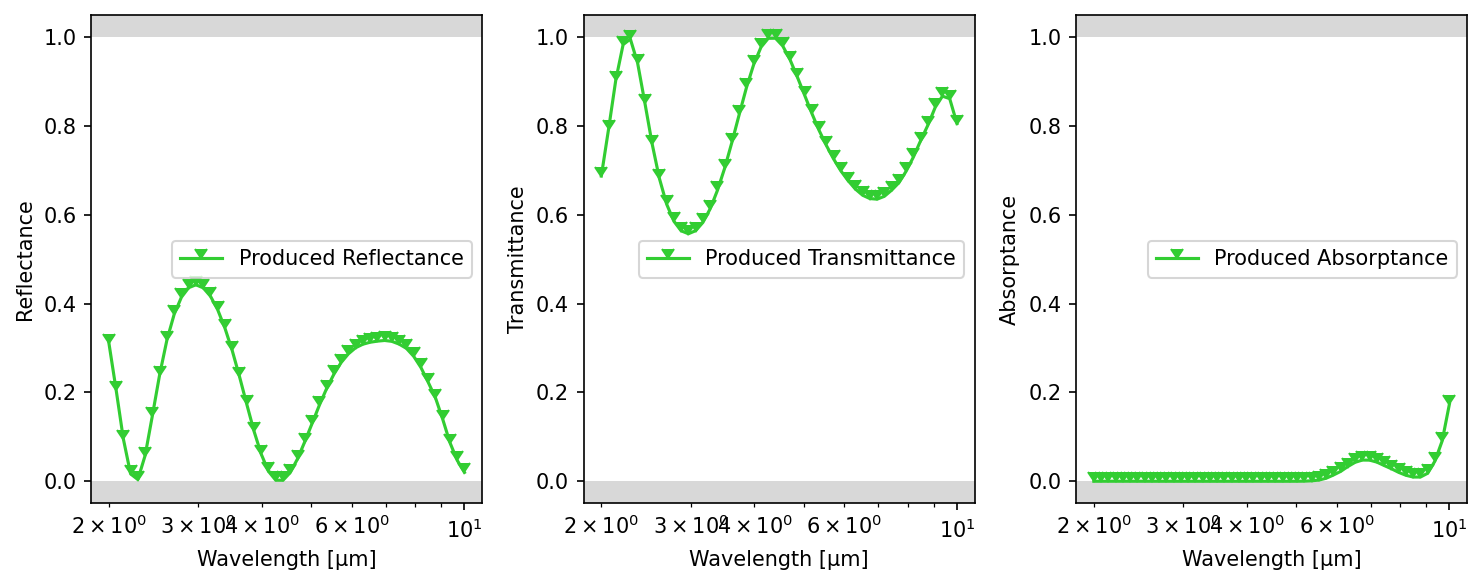

In [2]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 2e-6
cfg.physical_wavelength_range[1] = 1e-5
cfg.TRCWA_PER_LAYER_THICKNESS = [1.]
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.freq_distribution = "log"
cfg.siren_omega = 1.

# Let's investigate 32 frequency points
cfg.N_freq = 50

# Currently, the target spectra is set manually as a list of numbers 
cfg.target_reflectance_spectrum = [0.01990215,0.04728071,0.08716609,0.13999258,0.18830960,0.22315259,0.25630232,0.28152192,0.29933946,0.30892036,0.31509786,0.31710336,0.31556279,0.31309837,0.30863096,0.30071653,0.28684941,0.26730741,0.24081118,0.20858054,0.17094725,0.12999624,0.08915847,0.05051830,0.01976309,0.00227082,0.00242139,0.02239073,0.06111604,0.11309443,0.17386812,0.23612637,0.29457018,0.34478804,0.38628227,0.41693407,0.43564378,0.44249644,0.43594932,0.41444401,0.37586218,0.31787402,0.23989091,0.14770234,0.05799381,0.00398777,0.01661932,0.09557429,0.20664216,0.31245563,]
cfg.target_transmittance_spectrum = [0.80566155,0.86160385,0.86728087,0.84190447,0.80215258,0.76732824,0.73015897,0.69836191,0.67238730,0.65553712,0.64175282,0.63528599,0.63663443,0.64418210,0.65811991,0.67710729,0.69911350,0.72590540,0.75649485,0.79033701,0.82874515,0.86990899,0.91078512,0.94943171,0.98018489,0.99767452,0.99752190,0.97755126,0.93882552,0.88684743,0.82607457,0.76381737,0.70537459,0.65515751,0.61366367,0.58301175,0.56430127,0.55744710,0.56399180,0.58549360,0.62407052,0.68205209,0.76002673,0.85220523,0.94190326,0.99590118,0.98326688,0.90431504,0.79325365,0.68744676,]

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

physical_wls, normalized_freqs = nidn.get_frequency_points(cfg)
print("Physical wavelengths are (in meters):")
print(physical_wls)

In [3]:
cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.N_layers = 1 # Choose number of layers
cfg.eps_oversampling = 1

In [4]:
cfg.pop("model",None); # Forget the old model

# Allowed range of epsilon values
cfg.real_min_eps = 0.01
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 1.0

cfg.type = "regression" # Choose type as described above
cfg.iterations = 3000 # Set number of training iterations (that is forward model evaluations) to perform

In [5]:
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 0              |seed                   : 100            |
model_type             : siren          |iterations             : 3000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : 0.01           |real_max_eps           : 20.0           |imag_min_eps           : 0.0            |
imag_max_eps           : 1.0            |Nx                     : 1              |Ny                     : 1              |
N_layers

In [6]:
nidn.run_training(cfg);

17:01:11|NIDN-INFO| ###  New Best=0.2919 with SpectrumLoss=0.2919 ### L1=0.2919
17:01:11|NIDN-INFO| It=0     Loss=0.2919   |  weighted_avg=0.2919  |  SpectrumLoss=0.2919 | L1=0.2919
17:01:11|NIDN-INFO| ###  New Best=0.2627 with SpectrumLoss=0.2627 ### L1=0.2627
17:01:12|NIDN-INFO| ###  New Best=0.2336 with SpectrumLoss=0.2336 ### L1=0.2336
17:01:12|NIDN-INFO| ###  New Best=0.2116 with SpectrumLoss=0.2116 ### L1=0.2116
17:01:12|NIDN-INFO| ###  New Best=0.1969 with SpectrumLoss=0.1969 ### L1=0.1969
17:01:13|NIDN-INFO| ###  New Best=0.1841 with SpectrumLoss=0.1841 ### L1=0.1841
17:01:13|NIDN-INFO| It=5     Loss=0.1841   |  weighted_avg=0.2301  |  SpectrumLoss=0.1841 | L1=0.1841
17:01:13|NIDN-INFO| ###  New Best=0.1775 with SpectrumLoss=0.1775 ### L1=0.1775
17:01:13|NIDN-INFO| ###  New Best=0.1729 with SpectrumLoss=0.1729 ### L1=0.1729
17:01:13|NIDN-INFO| ###  New Best=0.1695 with SpectrumLoss=0.1695 ### L1=0.1695
17:01:14|NIDN-INFO| ###  New Best=0.1655 with SpectrumLoss=0.1655 ### L1=0.1

17:01:32|NIDN-INFO| ###  New Best=0.0361 with SpectrumLoss=0.0361 ### L1=0.0361
17:01:32|NIDN-INFO| ###  New Best=0.0353 with SpectrumLoss=0.0353 ### L1=0.0353
17:01:32|NIDN-INFO| It=80    Loss=0.0373   |  weighted_avg=0.0394  |  SpectrumLoss=0.0373 | L1=0.0373
17:01:32|NIDN-INFO| ###  New Best=0.0347 with SpectrumLoss=0.0347 ### L1=0.0347
17:01:33|NIDN-INFO| ###  New Best=0.0345 with SpectrumLoss=0.0345 ### L1=0.0345
17:01:33|NIDN-INFO| ###  New Best=0.0343 with SpectrumLoss=0.0343 ### L1=0.0343
17:01:33|NIDN-INFO| ###  New Best=0.0335 with SpectrumLoss=0.0335 ### L1=0.0335
17:01:33|NIDN-INFO| It=85    Loss=0.0335   |  weighted_avg=0.0372  |  SpectrumLoss=0.0335 | L1=0.0335
17:01:34|NIDN-INFO| ###  New Best=0.0330 with SpectrumLoss=0.0330 ### L1=0.0330
17:01:35|NIDN-INFO| ###  New Best=0.0323 with SpectrumLoss=0.0323 ### L1=0.0323
17:01:35|NIDN-INFO| It=90    Loss=0.0323   |  weighted_avg=0.0355  |  SpectrumLoss=0.0323 | L1=0.0323
17:01:35|NIDN-INFO| ###  New Best=0.0320 with Spectrum

17:02:19|NIDN-INFO| It=260   Loss=0.0240   |  weighted_avg=0.0241  |  SpectrumLoss=0.0240 | L1=0.0240
17:02:20|NIDN-INFO| It=265   Loss=0.0278   |  weighted_avg=0.0242  |  SpectrumLoss=0.0278 | L1=0.0278
17:02:22|NIDN-INFO| It=270   Loss=0.0237   |  weighted_avg=0.0240  |  SpectrumLoss=0.0237 | L1=0.0237
17:02:23|NIDN-INFO| ###  New Best=0.0222 with SpectrumLoss=0.0222 ### L1=0.0222
17:02:23|NIDN-INFO| It=275   Loss=0.0246   |  weighted_avg=0.0248  |  SpectrumLoss=0.0246 | L1=0.0246
17:02:24|NIDN-INFO| It=280   Loss=0.0243   |  weighted_avg=0.0250  |  SpectrumLoss=0.0243 | L1=0.0243
17:02:25|NIDN-INFO| It=285   Loss=0.0250   |  weighted_avg=0.0250  |  SpectrumLoss=0.0250 | L1=0.0250
17:02:27|NIDN-INFO| It=290   Loss=0.0247   |  weighted_avg=0.0251  |  SpectrumLoss=0.0247 | L1=0.0247
17:02:28|NIDN-INFO| It=295   Loss=0.0243   |  weighted_avg=0.0246  |  SpectrumLoss=0.0243 | L1=0.0243
17:02:29|NIDN-INFO| It=300   Loss=0.0266   |  weighted_avg=0.0247  |  SpectrumLoss=0.0266 | L1=0.0266
17

17:03:31|NIDN-INFO| It=535   Loss=0.0185   |  weighted_avg=0.0190  |  SpectrumLoss=0.0185 | L1=0.0185
17:03:32|NIDN-INFO| It=540   Loss=0.0186   |  weighted_avg=0.0194  |  SpectrumLoss=0.0186 | L1=0.0186
17:03:33|NIDN-INFO| It=545   Loss=0.0202   |  weighted_avg=0.0196  |  SpectrumLoss=0.0202 | L1=0.0202
17:03:35|NIDN-INFO| It=550   Loss=0.0186   |  weighted_avg=0.0195  |  SpectrumLoss=0.0186 | L1=0.0186
17:03:36|NIDN-INFO| It=555   Loss=0.0182   |  weighted_avg=0.0193  |  SpectrumLoss=0.0182 | L1=0.0182
17:03:36|NIDN-INFO| ###  New Best=0.0177 with SpectrumLoss=0.0177 ### L1=0.0177
17:03:37|NIDN-INFO| It=560   Loss=0.0192   |  weighted_avg=0.0188  |  SpectrumLoss=0.0192 | L1=0.0192
17:03:38|NIDN-INFO| It=565   Loss=0.0182   |  weighted_avg=0.0186  |  SpectrumLoss=0.0182 | L1=0.0182
17:03:40|NIDN-INFO| It=570   Loss=0.0192   |  weighted_avg=0.0186  |  SpectrumLoss=0.0192 | L1=0.0192
17:03:41|NIDN-INFO| It=575   Loss=0.0187   |  weighted_avg=0.0190  |  SpectrumLoss=0.0187 | L1=0.0187
17

17:04:43|NIDN-INFO| It=810   Loss=0.0160   |  weighted_avg=0.0176  |  SpectrumLoss=0.0160 | L1=0.0160
17:04:44|NIDN-INFO| It=815   Loss=0.0135   |  weighted_avg=0.0173  |  SpectrumLoss=0.0135 | L1=0.0135
17:04:45|NIDN-INFO| It=820   Loss=0.0164   |  weighted_avg=0.0167  |  SpectrumLoss=0.0164 | L1=0.0164
17:04:46|NIDN-INFO| It=825   Loss=0.0187   |  weighted_avg=0.0167  |  SpectrumLoss=0.0187 | L1=0.0187
17:04:48|NIDN-INFO| It=830   Loss=0.0173   |  weighted_avg=0.0168  |  SpectrumLoss=0.0173 | L1=0.0173
17:04:49|NIDN-INFO| It=835   Loss=0.0165   |  weighted_avg=0.0172  |  SpectrumLoss=0.0165 | L1=0.0165
17:04:50|NIDN-INFO| It=840   Loss=0.0151   |  weighted_avg=0.0169  |  SpectrumLoss=0.0151 | L1=0.0151
17:04:52|NIDN-INFO| It=845   Loss=0.0157   |  weighted_avg=0.0162  |  SpectrumLoss=0.0157 | L1=0.0157
17:04:53|NIDN-INFO| It=850   Loss=0.0176   |  weighted_avg=0.0159  |  SpectrumLoss=0.0176 | L1=0.0176
17:04:54|NIDN-INFO| It=855   Loss=0.0175   |  weighted_avg=0.0162  |  SpectrumLoss

17:06:01|NIDN-INFO| It=1110  Loss=0.0157   |  weighted_avg=0.0149  |  SpectrumLoss=0.0157 | L1=0.0157
17:06:03|NIDN-INFO| It=1115  Loss=0.0123   |  weighted_avg=0.0145  |  SpectrumLoss=0.0123 | L1=0.0123
17:06:04|NIDN-INFO| It=1120  Loss=0.0163   |  weighted_avg=0.0146  |  SpectrumLoss=0.0163 | L1=0.0163
17:06:05|NIDN-INFO| It=1125  Loss=0.0135   |  weighted_avg=0.0144  |  SpectrumLoss=0.0135 | L1=0.0135
17:06:07|NIDN-INFO| It=1130  Loss=0.0133   |  weighted_avg=0.0139  |  SpectrumLoss=0.0133 | L1=0.0133
17:06:08|NIDN-INFO| It=1135  Loss=0.0123   |  weighted_avg=0.0135  |  SpectrumLoss=0.0123 | L1=0.0123
17:06:09|NIDN-INFO| It=1140  Loss=0.0130   |  weighted_avg=0.0127  |  SpectrumLoss=0.0130 | L1=0.0130
17:06:11|NIDN-INFO| It=1145  Loss=0.0134   |  weighted_avg=0.0125  |  SpectrumLoss=0.0134 | L1=0.0134
17:06:12|NIDN-INFO| ###  New Best=0.0109 with SpectrumLoss=0.0109 ### L1=0.0109
17:06:12|NIDN-INFO| It=1150  Loss=0.0131   |  weighted_avg=0.0124  |  SpectrumLoss=0.0131 | L1=0.0131
17

17:07:17|NIDN-INFO| It=1400  Loss=0.0102   |  weighted_avg=0.0122  |  SpectrumLoss=0.0102 | L1=0.0102
17:07:18|NIDN-INFO| ###  New Best=0.0101 with SpectrumLoss=0.0101 ### L1=0.0101
17:07:19|NIDN-INFO| It=1405  Loss=0.0105   |  weighted_avg=0.0116  |  SpectrumLoss=0.0105 | L1=0.0105
17:07:20|NIDN-INFO| It=1410  Loss=0.0122   |  weighted_avg=0.0112  |  SpectrumLoss=0.0122 | L1=0.0122
17:07:21|NIDN-INFO| It=1415  Loss=0.0104   |  weighted_avg=0.0109  |  SpectrumLoss=0.0104 | L1=0.0104
17:07:22|NIDN-INFO| ###  New Best=0.0094 with SpectrumLoss=0.0094 ### L1=0.0094
17:07:23|NIDN-INFO| It=1420  Loss=0.0102   |  weighted_avg=0.0107  |  SpectrumLoss=0.0102 | L1=0.0102
17:07:24|NIDN-INFO| It=1425  Loss=0.0106   |  weighted_avg=0.0107  |  SpectrumLoss=0.0106 | L1=0.0106
17:07:24|NIDN-INFO| ###  New Best=0.0094 with SpectrumLoss=0.0094 ### L1=0.0094
17:07:25|NIDN-INFO| It=1430  Loss=0.0104   |  weighted_avg=0.0104  |  SpectrumLoss=0.0104 | L1=0.0104
17:07:27|NIDN-INFO| It=1435  Loss=0.0117   |  

17:08:31|NIDN-INFO| It=1680  Loss=0.0075   |  weighted_avg=0.0075  |  SpectrumLoss=0.0075 | L1=0.0075
17:08:32|NIDN-INFO| It=1685  Loss=0.0068   |  weighted_avg=0.0077  |  SpectrumLoss=0.0068 | L1=0.0068
17:08:33|NIDN-INFO| It=1690  Loss=0.0096   |  weighted_avg=0.0081  |  SpectrumLoss=0.0096 | L1=0.0096
17:08:35|NIDN-INFO| It=1695  Loss=0.0089   |  weighted_avg=0.0082  |  SpectrumLoss=0.0089 | L1=0.0089
17:08:36|NIDN-INFO| It=1700  Loss=0.0076   |  weighted_avg=0.0084  |  SpectrumLoss=0.0076 | L1=0.0076
17:08:37|NIDN-INFO| It=1705  Loss=0.0089   |  weighted_avg=0.0087  |  SpectrumLoss=0.0089 | L1=0.0089
17:08:39|NIDN-INFO| It=1710  Loss=0.0080   |  weighted_avg=0.0087  |  SpectrumLoss=0.0080 | L1=0.0080
17:08:40|NIDN-INFO| It=1715  Loss=0.0076   |  weighted_avg=0.0084  |  SpectrumLoss=0.0076 | L1=0.0076
17:08:41|NIDN-INFO| It=1720  Loss=0.0086   |  weighted_avg=0.0082  |  SpectrumLoss=0.0086 | L1=0.0086
17:08:42|NIDN-INFO| ###  New Best=0.0064 with SpectrumLoss=0.0064 ### L1=0.0064
17

17:09:51|NIDN-INFO| It=1985  Loss=0.0074   |  weighted_avg=0.0072  |  SpectrumLoss=0.0074 | L1=0.0074
17:09:52|NIDN-INFO| It=1990  Loss=0.0056   |  weighted_avg=0.0074  |  SpectrumLoss=0.0056 | L1=0.0056
17:09:53|NIDN-INFO| It=1995  Loss=0.0071   |  weighted_avg=0.0075  |  SpectrumLoss=0.0071 | L1=0.0071
17:09:55|NIDN-INFO| It=2000  Loss=0.0069   |  weighted_avg=0.0075  |  SpectrumLoss=0.0069 | L1=0.0069
17:09:56|NIDN-INFO| It=2005  Loss=0.0059   |  weighted_avg=0.0073  |  SpectrumLoss=0.0059 | L1=0.0059
17:09:57|NIDN-INFO| It=2010  Loss=0.0057   |  weighted_avg=0.0068  |  SpectrumLoss=0.0057 | L1=0.0057
17:09:59|NIDN-INFO| It=2015  Loss=0.0079   |  weighted_avg=0.0067  |  SpectrumLoss=0.0079 | L1=0.0079
17:10:00|NIDN-INFO| It=2020  Loss=0.0057   |  weighted_avg=0.0065  |  SpectrumLoss=0.0057 | L1=0.0057
17:10:01|NIDN-INFO| It=2025  Loss=0.0071   |  weighted_avg=0.0065  |  SpectrumLoss=0.0071 | L1=0.0071
17:10:03|NIDN-INFO| It=2030  Loss=0.0080   |  weighted_avg=0.0069  |  SpectrumLoss

17:11:11|NIDN-INFO| It=2295  Loss=0.0086   |  weighted_avg=0.0085  |  SpectrumLoss=0.0086 | L1=0.0086
17:11:13|NIDN-INFO| It=2300  Loss=0.0091   |  weighted_avg=0.0082  |  SpectrumLoss=0.0091 | L1=0.0091
17:11:14|NIDN-INFO| It=2305  Loss=0.0072   |  weighted_avg=0.0081  |  SpectrumLoss=0.0072 | L1=0.0072
17:11:15|NIDN-INFO| It=2310  Loss=0.0057   |  weighted_avg=0.0076  |  SpectrumLoss=0.0057 | L1=0.0057
17:11:17|NIDN-INFO| It=2315  Loss=0.0058   |  weighted_avg=0.0068  |  SpectrumLoss=0.0058 | L1=0.0058
17:11:18|NIDN-INFO| It=2320  Loss=0.0068   |  weighted_avg=0.0064  |  SpectrumLoss=0.0068 | L1=0.0068
17:11:19|NIDN-INFO| It=2325  Loss=0.0051   |  weighted_avg=0.0060  |  SpectrumLoss=0.0051 | L1=0.0051
17:11:21|NIDN-INFO| It=2330  Loss=0.0083   |  weighted_avg=0.0064  |  SpectrumLoss=0.0083 | L1=0.0083
17:11:22|NIDN-INFO| It=2335  Loss=0.0064   |  weighted_avg=0.0067  |  SpectrumLoss=0.0064 | L1=0.0064
17:11:23|NIDN-INFO| It=2340  Loss=0.0074   |  weighted_avg=0.0068  |  SpectrumLoss

17:12:34|NIDN-INFO| It=2610  Loss=0.0066   |  weighted_avg=0.0059  |  SpectrumLoss=0.0066 | L1=0.0066
17:12:35|NIDN-INFO| It=2615  Loss=0.0059   |  weighted_avg=0.0062  |  SpectrumLoss=0.0059 | L1=0.0059
17:12:37|NIDN-INFO| It=2620  Loss=0.0075   |  weighted_avg=0.0068  |  SpectrumLoss=0.0075 | L1=0.0075
17:12:38|NIDN-INFO| It=2625  Loss=0.0088   |  weighted_avg=0.0071  |  SpectrumLoss=0.0088 | L1=0.0088
17:12:39|NIDN-INFO| It=2630  Loss=0.0049   |  weighted_avg=0.0072  |  SpectrumLoss=0.0049 | L1=0.0049
17:12:41|NIDN-INFO| It=2635  Loss=0.0058   |  weighted_avg=0.0072  |  SpectrumLoss=0.0058 | L1=0.0058
17:12:42|NIDN-INFO| It=2640  Loss=0.0052   |  weighted_avg=0.0069  |  SpectrumLoss=0.0052 | L1=0.0052
17:12:43|NIDN-INFO| It=2645  Loss=0.0049   |  weighted_avg=0.0063  |  SpectrumLoss=0.0049 | L1=0.0049
17:12:44|NIDN-INFO| ###  New Best=0.0042 with SpectrumLoss=0.0042 ### L1=0.0042
17:12:44|NIDN-INFO| It=2650  Loss=0.0045   |  weighted_avg=0.0058  |  SpectrumLoss=0.0045 | L1=0.0045
17

17:13:55|NIDN-INFO| It=2920  Loss=0.0046   |  weighted_avg=0.0048  |  SpectrumLoss=0.0046 | L1=0.0046
17:13:56|NIDN-INFO| It=2925  Loss=0.0043   |  weighted_avg=0.0049  |  SpectrumLoss=0.0043 | L1=0.0043
17:13:58|NIDN-INFO| It=2930  Loss=0.0059   |  weighted_avg=0.0052  |  SpectrumLoss=0.0059 | L1=0.0059
17:13:59|NIDN-INFO| It=2935  Loss=0.0061   |  weighted_avg=0.0055  |  SpectrumLoss=0.0061 | L1=0.0061
17:14:00|NIDN-INFO| It=2940  Loss=0.0069   |  weighted_avg=0.0062  |  SpectrumLoss=0.0069 | L1=0.0069
17:14:02|NIDN-INFO| It=2945  Loss=0.0059   |  weighted_avg=0.0064  |  SpectrumLoss=0.0059 | L1=0.0059
17:14:03|NIDN-INFO| It=2950  Loss=0.0058   |  weighted_avg=0.0063  |  SpectrumLoss=0.0058 | L1=0.0058
17:14:04|NIDN-INFO| It=2955  Loss=0.0052   |  weighted_avg=0.0061  |  SpectrumLoss=0.0052 | L1=0.0052
17:14:06|NIDN-INFO| It=2960  Loss=0.0050   |  weighted_avg=0.0056  |  SpectrumLoss=0.0050 | L1=0.0050
17:14:07|NIDN-INFO| It=2965  Loss=0.0058   |  weighted_avg=0.0054  |  SpectrumLoss

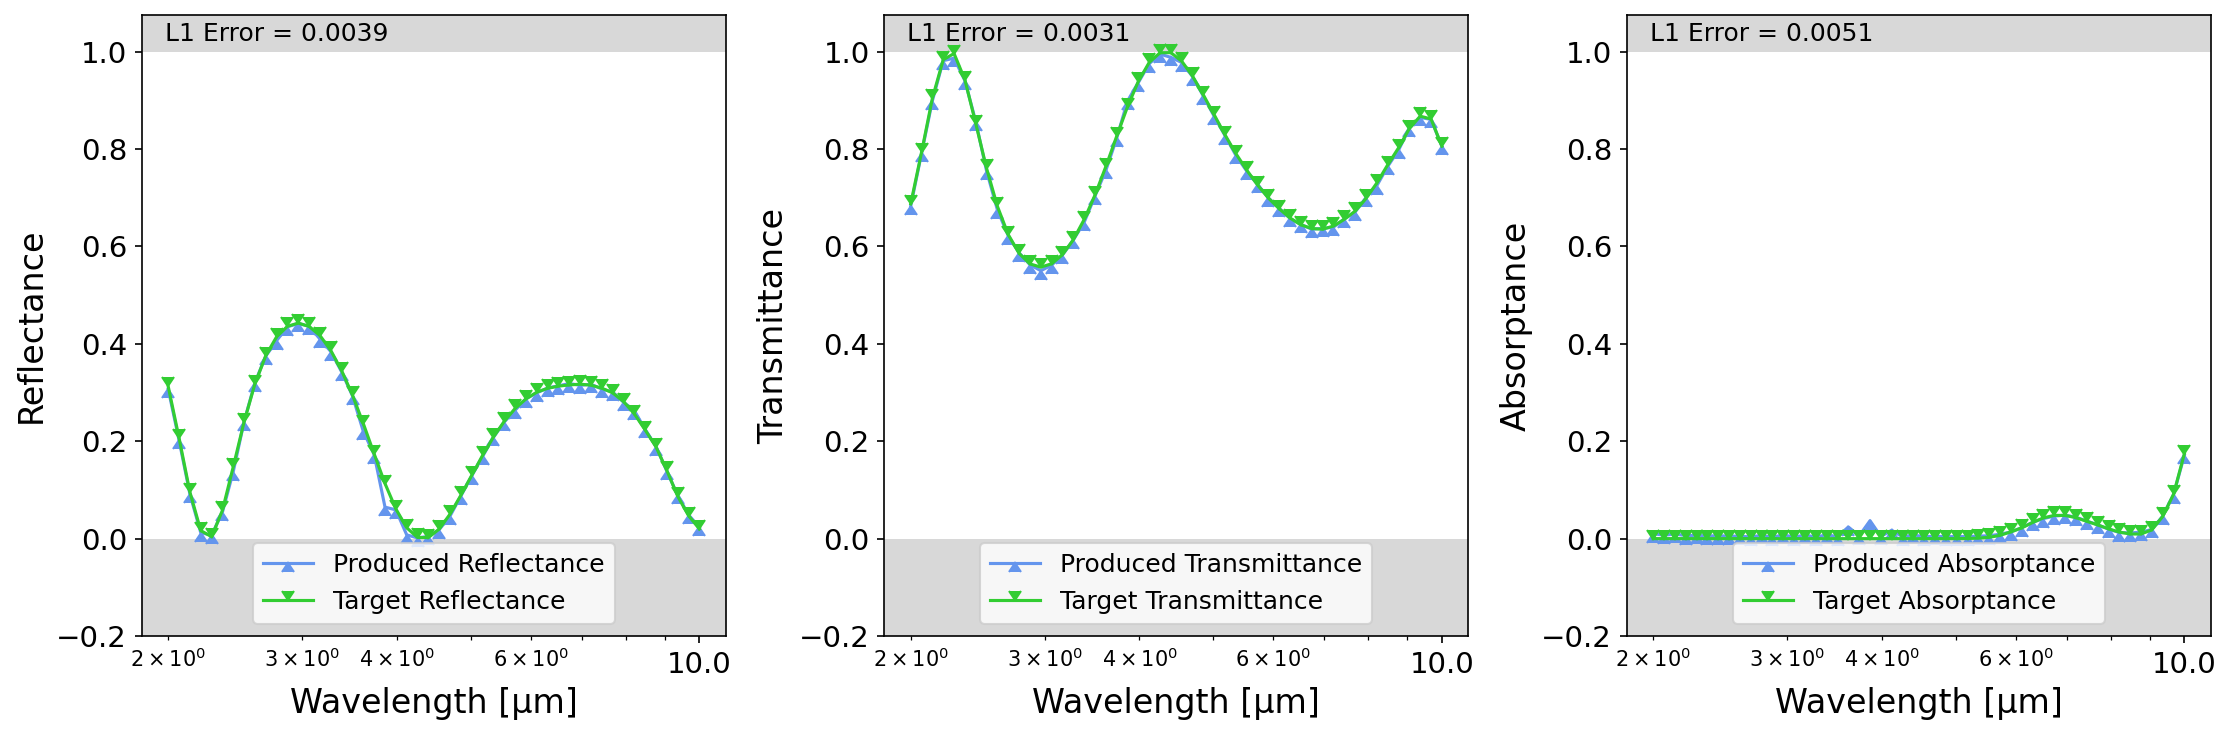

In [7]:
nidn.plot_spectra(cfg)

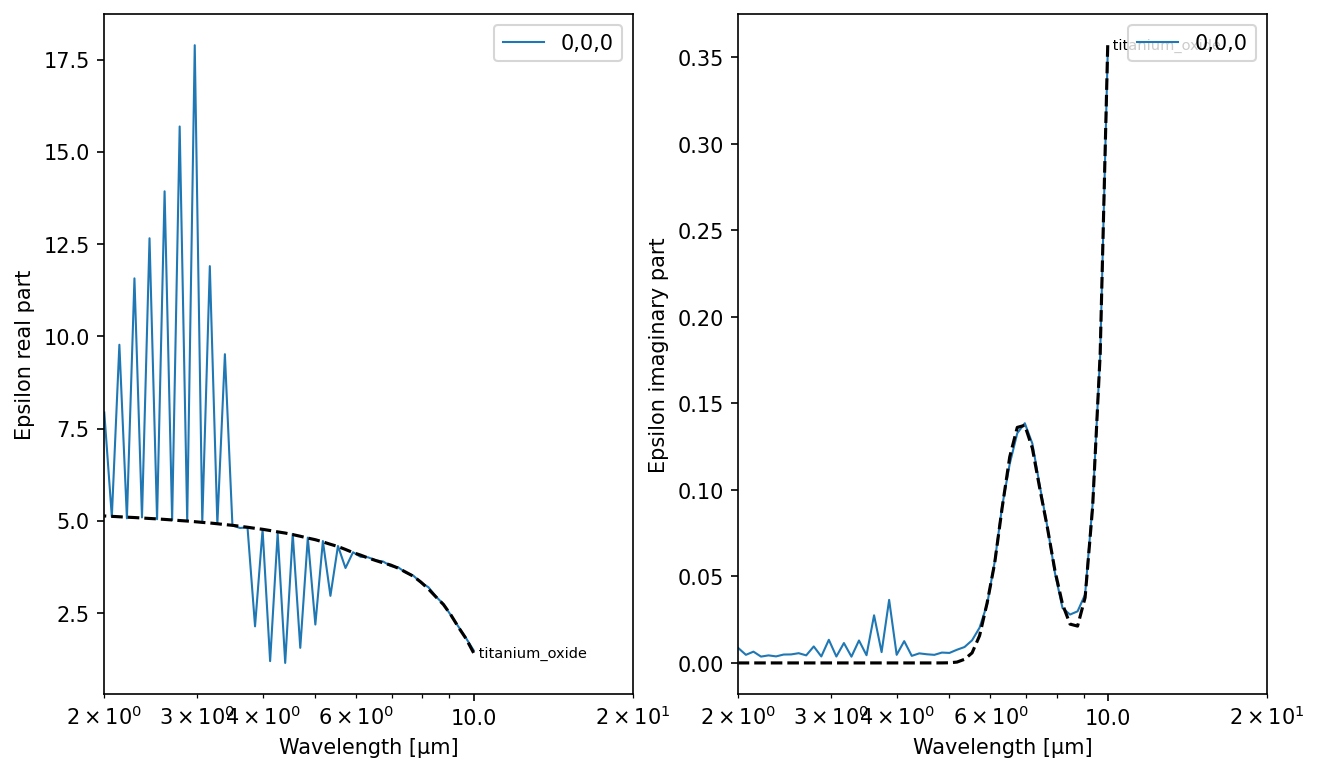

In [11]:
nidn.plot_eps_per_point(cfg,compare_to_material="titanium_oxide")

# Single layer , uniform, classification

In [12]:
cfg.pop("model",None); # Forget the old model

# Allowed range of epsilon values
cfg.real_min_eps = 0.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 3.0

cfg.type = "classification" # Choose type as described above
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [13]:
nidn.run_training(cfg);

17:28:14|NIDN-INFO| ###  New Best=0.3353 with SpectrumLoss=0.3307 ### L1=0.3307
17:28:14|NIDN-INFO| It=0     Loss=0.3353   |  weighted_avg=0.3353  |  SpectrumLoss=0.3307 | L1=0.3307
17:28:15|NIDN-INFO| ###  New Best=0.2659 with SpectrumLoss=0.2613 ### L1=0.2613
17:28:15|NIDN-INFO| ###  New Best=0.2377 with SpectrumLoss=0.2331 ### L1=0.2331
17:28:15|NIDN-INFO| ###  New Best=0.2083 with SpectrumLoss=0.2037 ### L1=0.2037
17:28:15|NIDN-INFO| ###  New Best=0.1671 with SpectrumLoss=0.1625 ### L1=0.1625
17:28:16|NIDN-INFO| ###  New Best=0.1238 with SpectrumLoss=0.1194 ### L1=0.1194
17:28:16|NIDN-INFO| It=5     Loss=0.1238   |  weighted_avg=0.2230  |  SpectrumLoss=0.1194 | L1=0.1194
17:28:16|NIDN-INFO| ###  New Best=0.0886 with SpectrumLoss=0.0847 ### L1=0.0847
17:28:16|NIDN-INFO| ###  New Best=0.0620 with SpectrumLoss=0.0585 ### L1=0.0585
17:28:16|NIDN-INFO| ###  New Best=0.0432 with SpectrumLoss=0.0399 ### L1=0.0399
17:28:17|NIDN-INFO| ###  New Best=0.0306 with SpectrumLoss=0.0275 ### L1=0.0

17:28:30|NIDN-INFO| ###  New Best=0.0016 with SpectrumLoss=0.0013 ### L1=0.0013
17:28:31|NIDN-INFO| ###  New Best=0.0015 with SpectrumLoss=0.0013 ### L1=0.0013
17:28:31|NIDN-INFO| ###  New Best=0.0015 with SpectrumLoss=0.0013 ### L1=0.0013
17:28:31|NIDN-INFO| ###  New Best=0.0015 with SpectrumLoss=0.0013 ### L1=0.0013
17:28:31|NIDN-INFO| It=65    Loss=0.0015   |  weighted_avg=0.0018  |  SpectrumLoss=0.0013 | L1=0.0013
17:28:31|NIDN-INFO| ###  New Best=0.0015 with SpectrumLoss=0.0012 ### L1=0.0012
17:28:32|NIDN-INFO| ###  New Best=0.0015 with SpectrumLoss=0.0012 ### L1=0.0012
17:28:32|NIDN-INFO| ###  New Best=0.0014 with SpectrumLoss=0.0012 ### L1=0.0012
17:28:32|NIDN-INFO| ###  New Best=0.0014 with SpectrumLoss=0.0012 ### L1=0.0012
17:28:32|NIDN-INFO| ###  New Best=0.0014 with SpectrumLoss=0.0012 ### L1=0.0012
17:28:32|NIDN-INFO| It=70    Loss=0.0014   |  weighted_avg=0.0016  |  SpectrumLoss=0.0012 | L1=0.0012
17:28:33|NIDN-INFO| ###  New Best=0.0014 with SpectrumLoss=0.0012 ### L1=0.0

17:28:47|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0007 ### L1=0.0007
17:28:47|NIDN-INFO| It=125   Loss=0.0009   |  weighted_avg=0.0009  |  SpectrumLoss=0.0007 | L1=0.0007
17:28:47|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0007 ### L1=0.0007
17:28:47|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0007 ### L1=0.0007
17:28:47|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0007 ### L1=0.0007
17:28:48|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0007 ### L1=0.0007
17:28:48|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0007 ### L1=0.0007
17:28:48|NIDN-INFO| It=130   Loss=0.0009   |  weighted_avg=0.0009  |  SpectrumLoss=0.0007 | L1=0.0007
17:28:48|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0007 ### L1=0.0007
17:28:49|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0007 ### L1=0.0007
17:28:49|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0007 ### L1=0.0007
17:28:49|NIDN-INFO| ###  New Best=0.0008 with SpectrumLoss=0.0007 ### L1=0.0

17:29:03|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:29:03|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:29:03|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:29:03|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:29:03|NIDN-INFO| It=190   Loss=0.0006   |  weighted_avg=0.0006  |  SpectrumLoss=0.0005 | L1=0.0005
17:29:04|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:29:04|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:29:04|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:29:05|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:29:05|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:29:05|NIDN-INFO| It=195   Loss=0.0006   |  weighted_avg=0.0006  |  SpectrumLoss=0.0005 | L1=0.0005
17:29:05|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0

17:29:19|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:29:19|NIDN-INFO| It=250   Loss=0.0005   |  weighted_avg=0.0005  |  SpectrumLoss=0.0004 | L1=0.0004
17:29:19|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:29:19|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:29:20|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:29:20|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:29:20|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:29:20|NIDN-INFO| It=255   Loss=0.0004   |  weighted_avg=0.0005  |  SpectrumLoss=0.0004 | L1=0.0004
17:29:20|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:29:21|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:29:21|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:29:21|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0

17:29:35|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:29:35|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:29:36|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:29:36|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:29:36|NIDN-INFO| It=315   Loss=0.0004   |  weighted_avg=0.0004  |  SpectrumLoss=0.0003 | L1=0.0003
17:29:36|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:29:36|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:29:37|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:29:37|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:29:37|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:29:37|NIDN-INFO| It=320   Loss=0.0003   |  weighted_avg=0.0004  |  SpectrumLoss=0.0003 | L1=0.0003
17:29:37|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0

17:29:51|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:29:51|NIDN-INFO| It=375   Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0002 | L1=0.0002
17:29:52|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:29:52|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:29:52|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:29:52|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:29:53|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:29:53|NIDN-INFO| It=380   Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0002 | L1=0.0002
17:29:53|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:29:53|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:29:53|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:29:54|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0

17:30:07|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:08|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:08|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:08|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:08|NIDN-INFO| It=440   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:30:08|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:09|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:09|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:09|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:09|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:09|NIDN-INFO| It=445   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:30:10|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

17:30:24|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:24|NIDN-INFO| It=500   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:30:24|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:24|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:24|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:25|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:25|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:25|NIDN-INFO| It=505   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:30:25|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:25|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:26|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:26|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

17:30:39|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:40|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:40|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:40|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:40|NIDN-INFO| It=565   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:30:41|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:41|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:41|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:41|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:42|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:30:42|NIDN-INFO| It=570   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:30:42|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

17:30:56|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:30:56|NIDN-INFO| It=625   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0001 | L1=0.0001
17:30:57|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:30:57|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:30:57|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:30:58|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:30:58|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:30:58|NIDN-INFO| It=630   Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0001 | L1=0.0001
17:30:58|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:30:58|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:30:59|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:30:59|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0

17:31:13|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:13|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:14|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:14|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:14|NIDN-INFO| It=690   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:31:14|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:14|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:15|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:15|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:15|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:15|NIDN-INFO| It=695   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:31:15|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

17:31:29|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:29|NIDN-INFO| It=750   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:31:30|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:30|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:30|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:31|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:31|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:31|NIDN-INFO| It=755   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:31:31|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:31|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:32|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:32|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

17:31:46|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:46|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:46|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:47|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:47|NIDN-INFO| It=815   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:31:47|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:47|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:47|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:48|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:48|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:31:48|NIDN-INFO| It=820   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:31:48|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

17:32:03|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:03|NIDN-INFO| It=875   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:32:03|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:03|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:04|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:04|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:04|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:04|NIDN-INFO| It=880   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:32:04|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:05|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:05|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:05|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

17:32:20|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:20|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:20|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:20|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:20|NIDN-INFO| It=940   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:32:21|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:21|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:21|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:21|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:22|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:32:22|NIDN-INFO| It=945   Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:32:22|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

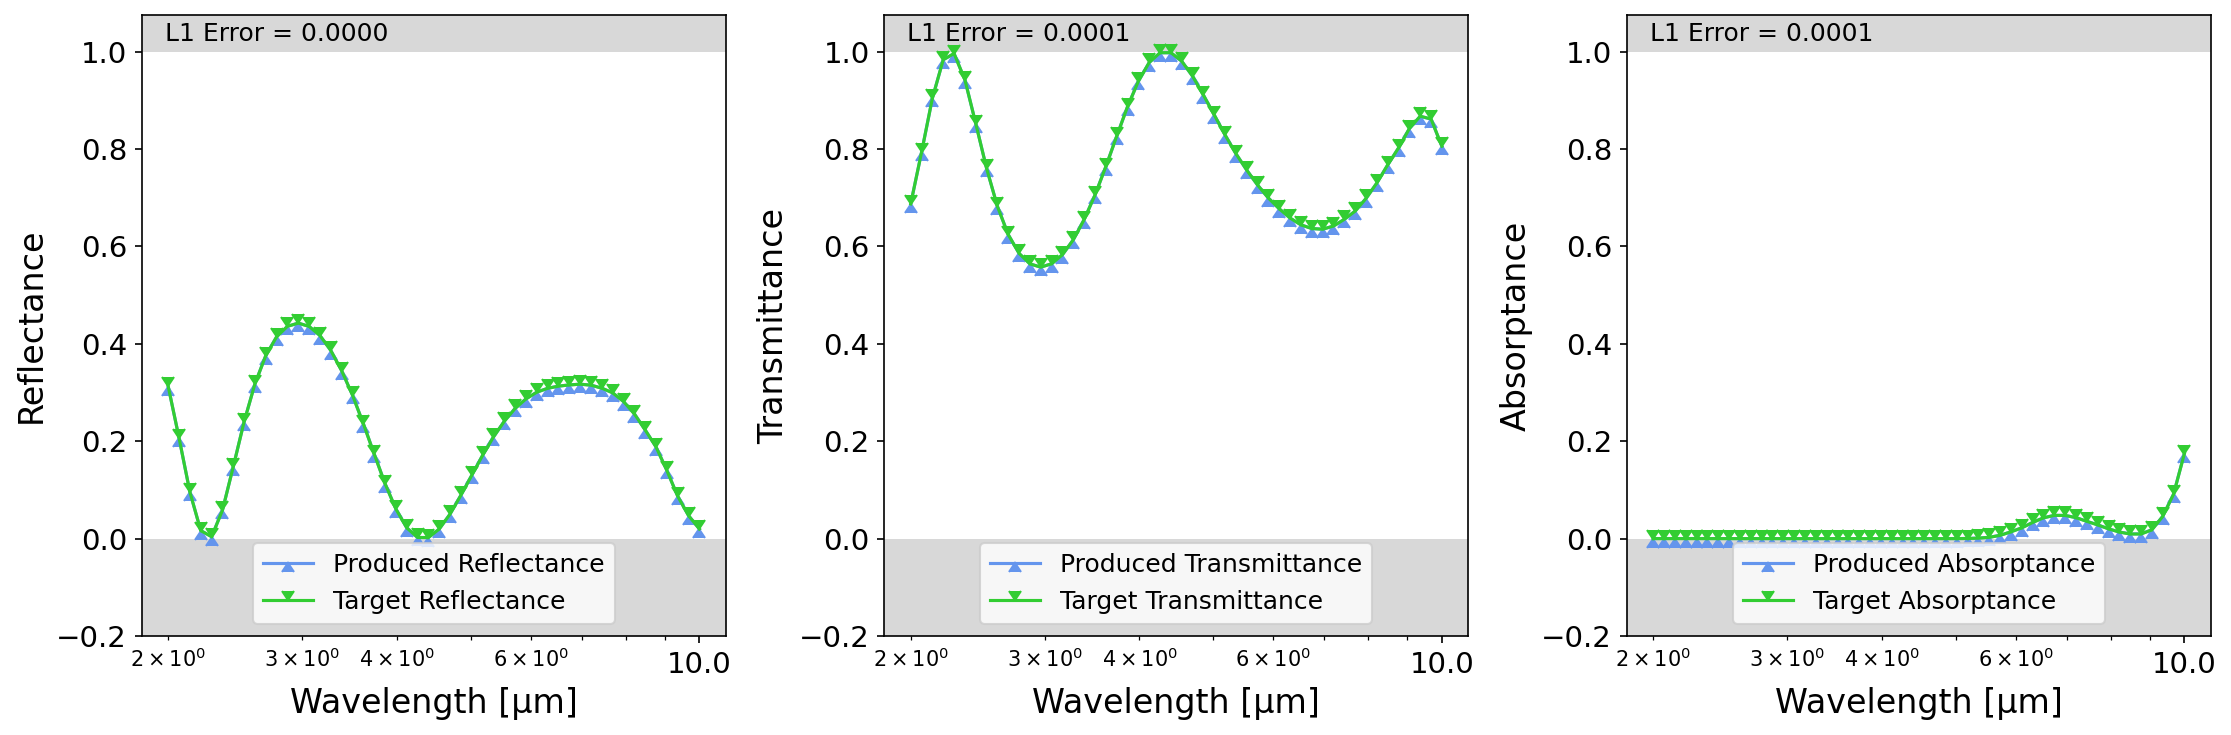

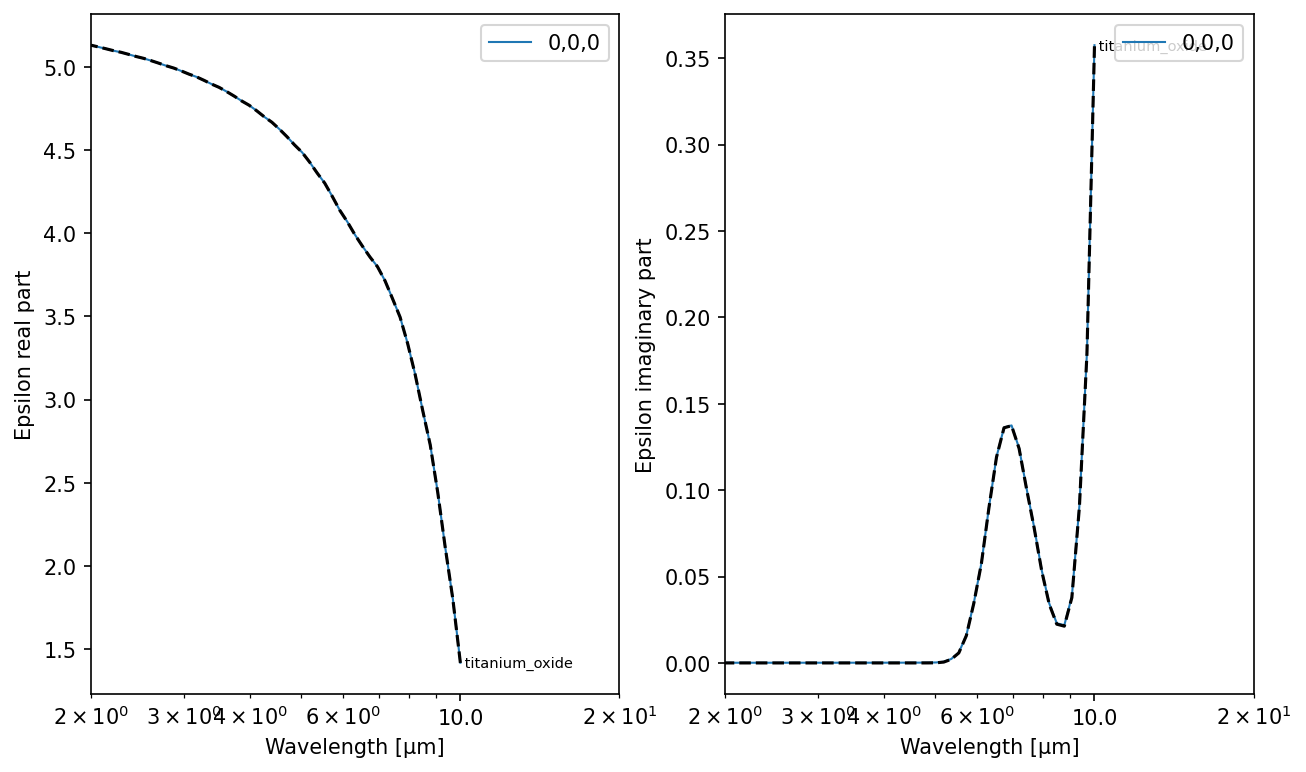

In [14]:
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg)

## Uniform 3-Layer Ground-truth 

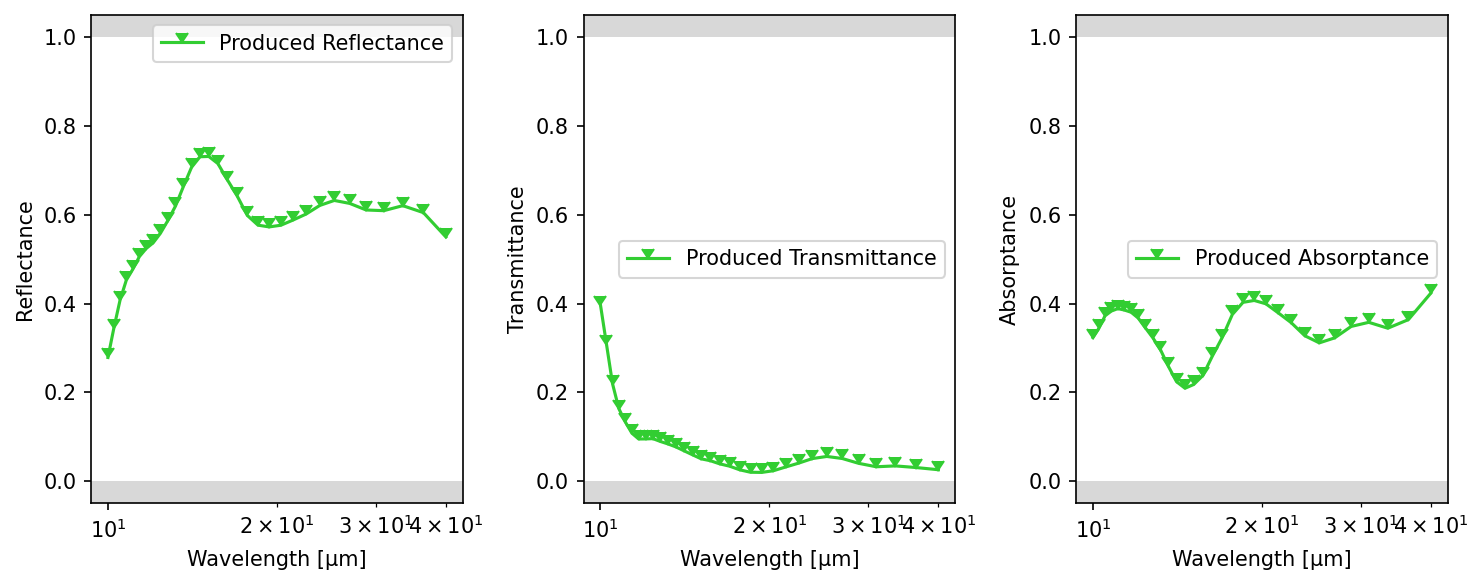

In [16]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Set grid specifics
cfg.Nx = 1
cfg.Ny = 1
cfg.N_layers = 3
cfg.N_freq = 32
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.TRCWA_NG = 11
cfg.TRCWA_PER_LAYER_THICKNESS = [1.0]
cfg.freq_distribution = "linear"

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 1e-5
cfg.physical_wavelength_range[1] = 4e-5

cfg.target_reflectance_spectrum = [0.55005782,0.60496502,0.62066166,0.60937998,0.61091496,0.62573035,0.63239681,0.62117495,0.60183070,0.58843758,0.57659786,0.57282597,0.57672235,0.59860364,0.64276949,0.67916063,0.71551643,0.73145107,0.73085603,0.70710124,0.66371328,0.61967796,0.58697495,0.55837736,0.53705611,0.52416312,0.50597608,0.47726774,0.45294034,0.40777731,0.34554019,0.27880253,]
cfg.target_transmittance_spectrum = [0.02601471,0.03096245,0.03463690,0.03266956,0.04043108,0.05131611,0.05590518,0.05112020,0.04086629,0.03220691,0.02374713,0.01998344,0.02033119,0.02573320,0.03400531,0.03918298,0.04632213,0.05050779,0.05963449,0.06865844,0.07741967,0.08407922,0.08973443,0.09605149,0.09535432,0.09522754,0.10836393,0.13393469,0.16375927,0.21962809,0.30981320,0.39759293,]

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

In [17]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model
cfg.real_min_eps = -15.0
cfg.real_max_eps = 30.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 50.0

cfg.type = "regression" # Choose type as described above (for now still regression)
cfg.iterations = 2000 # Set number of training iterations (that is forward model evaluations) to perform

In [18]:
nidn.run_training(cfg);

17:36:30|NIDN-INFO| ###  New Best=0.0967 with SpectrumLoss=0.0967 ### L1=0.0967
17:36:30|NIDN-INFO| It=0     Loss=0.0967   |  weighted_avg=0.0967  |  SpectrumLoss=0.0967 | L1=0.0967
17:36:30|NIDN-INFO| ###  New Best=0.0873 with SpectrumLoss=0.0873 ### L1=0.0873
17:36:31|NIDN-INFO| ###  New Best=0.0819 with SpectrumLoss=0.0819 ### L1=0.0819
17:36:31|NIDN-INFO| ###  New Best=0.0785 with SpectrumLoss=0.0785 ### L1=0.0785
17:36:31|NIDN-INFO| ###  New Best=0.0753 with SpectrumLoss=0.0753 ### L1=0.0753
17:36:31|NIDN-INFO| ###  New Best=0.0720 with SpectrumLoss=0.0720 ### L1=0.0720
17:36:31|NIDN-INFO| It=5     Loss=0.0720   |  weighted_avg=0.0819  |  SpectrumLoss=0.0720 | L1=0.0720
17:36:32|NIDN-INFO| ###  New Best=0.0687 with SpectrumLoss=0.0687 ### L1=0.0687
17:36:32|NIDN-INFO| ###  New Best=0.0655 with SpectrumLoss=0.0655 ### L1=0.0655
17:36:32|NIDN-INFO| ###  New Best=0.0624 with SpectrumLoss=0.0624 ### L1=0.0624
17:36:33|NIDN-INFO| ###  New Best=0.0608 with SpectrumLoss=0.0608 ### L1=0.0

17:36:51|NIDN-INFO| ###  New Best=0.0301 with SpectrumLoss=0.0301 ### L1=0.0301
17:36:51|NIDN-INFO| It=70    Loss=0.0301   |  weighted_avg=0.0330  |  SpectrumLoss=0.0301 | L1=0.0301
17:36:51|NIDN-INFO| ###  New Best=0.0292 with SpectrumLoss=0.0292 ### L1=0.0292
17:36:51|NIDN-INFO| ###  New Best=0.0289 with SpectrumLoss=0.0289 ### L1=0.0289
17:36:52|NIDN-INFO| It=75    Loss=0.0292   |  weighted_avg=0.0315  |  SpectrumLoss=0.0292 | L1=0.0292
17:36:52|NIDN-INFO| ###  New Best=0.0285 with SpectrumLoss=0.0285 ### L1=0.0285
17:36:54|NIDN-INFO| ###  New Best=0.0275 with SpectrumLoss=0.0275 ### L1=0.0275
17:36:54|NIDN-INFO| It=80    Loss=0.0275   |  weighted_avg=0.0304  |  SpectrumLoss=0.0275 | L1=0.0275
17:36:54|NIDN-INFO| ###  New Best=0.0273 with SpectrumLoss=0.0273 ### L1=0.0273
17:36:54|NIDN-INFO| ###  New Best=0.0261 with SpectrumLoss=0.0261 ### L1=0.0261
17:36:55|NIDN-INFO| It=85    Loss=0.0271   |  weighted_avg=0.0292  |  SpectrumLoss=0.0271 | L1=0.0271
17:36:56|NIDN-INFO| It=90    Los

17:37:49|NIDN-INFO| It=270   Loss=0.0213   |  weighted_avg=0.0210  |  SpectrumLoss=0.0213 | L1=0.0213
17:37:50|NIDN-INFO| ###  New Best=0.0202 with SpectrumLoss=0.0202 ### L1=0.0202
17:37:50|NIDN-INFO| It=275   Loss=0.0210   |  weighted_avg=0.0210  |  SpectrumLoss=0.0210 | L1=0.0210
17:37:52|NIDN-INFO| ###  New Best=0.0198 with SpectrumLoss=0.0198 ### L1=0.0198
17:37:52|NIDN-INFO| It=280   Loss=0.0204   |  weighted_avg=0.0209  |  SpectrumLoss=0.0204 | L1=0.0204
17:37:53|NIDN-INFO| ###  New Best=0.0196 with SpectrumLoss=0.0196 ### L1=0.0196
17:37:53|NIDN-INFO| It=285   Loss=0.0203   |  weighted_avg=0.0206  |  SpectrumLoss=0.0203 | L1=0.0203
17:37:55|NIDN-INFO| It=290   Loss=0.0198   |  weighted_avg=0.0203  |  SpectrumLoss=0.0198 | L1=0.0198
17:37:55|NIDN-INFO| ###  New Best=0.0194 with SpectrumLoss=0.0194 ### L1=0.0194
17:37:56|NIDN-INFO| It=295   Loss=0.0196   |  weighted_avg=0.0202  |  SpectrumLoss=0.0196 | L1=0.0196
17:37:58|NIDN-INFO| It=300   Loss=0.0195   |  weighted_avg=0.0199  |

17:38:49|NIDN-INFO| It=480   Loss=0.0170   |  weighted_avg=0.0170  |  SpectrumLoss=0.0170 | L1=0.0170
17:38:51|NIDN-INFO| It=485   Loss=0.0171   |  weighted_avg=0.0171  |  SpectrumLoss=0.0171 | L1=0.0171
17:38:52|NIDN-INFO| It=490   Loss=0.0168   |  weighted_avg=0.0171  |  SpectrumLoss=0.0168 | L1=0.0168
17:38:54|NIDN-INFO| It=495   Loss=0.0168   |  weighted_avg=0.0170  |  SpectrumLoss=0.0168 | L1=0.0168
17:38:55|NIDN-INFO| ###  New Best=0.0166 with SpectrumLoss=0.0166 ### L1=0.0166
17:38:55|NIDN-INFO| It=500   Loss=0.0166   |  weighted_avg=0.0170  |  SpectrumLoss=0.0166 | L1=0.0166
17:38:56|NIDN-INFO| It=505   Loss=0.0172   |  weighted_avg=0.0169  |  SpectrumLoss=0.0172 | L1=0.0172
17:38:58|NIDN-INFO| It=510   Loss=0.0168   |  weighted_avg=0.0169  |  SpectrumLoss=0.0168 | L1=0.0168
17:38:59|NIDN-INFO| It=515   Loss=0.0171   |  weighted_avg=0.0169  |  SpectrumLoss=0.0171 | L1=0.0171
17:39:00|NIDN-INFO| ###  New Best=0.0165 with SpectrumLoss=0.0165 ### L1=0.0165
17:39:01|NIDN-INFO| It=5

17:40:02|NIDN-INFO| It=730   Loss=0.0159   |  weighted_avg=0.0159  |  SpectrumLoss=0.0159 | L1=0.0159
17:40:03|NIDN-INFO| ###  New Best=0.0152 with SpectrumLoss=0.0152 ### L1=0.0152
17:40:03|NIDN-INFO| It=735   Loss=0.0152   |  weighted_avg=0.0158  |  SpectrumLoss=0.0152 | L1=0.0152
17:40:05|NIDN-INFO| ###  New Best=0.0152 with SpectrumLoss=0.0152 ### L1=0.0152
17:40:05|NIDN-INFO| It=740   Loss=0.0152   |  weighted_avg=0.0157  |  SpectrumLoss=0.0152 | L1=0.0152
17:40:05|NIDN-INFO| ###  New Best=0.0150 with SpectrumLoss=0.0150 ### L1=0.0150
17:40:06|NIDN-INFO| ###  New Best=0.0150 with SpectrumLoss=0.0150 ### L1=0.0150
17:40:06|NIDN-INFO| It=745   Loss=0.0155   |  weighted_avg=0.0155  |  SpectrumLoss=0.0155 | L1=0.0155
17:40:08|NIDN-INFO| It=750   Loss=0.0151   |  weighted_avg=0.0153  |  SpectrumLoss=0.0151 | L1=0.0151
17:40:08|NIDN-INFO| ###  New Best=0.0149 with SpectrumLoss=0.0149 ### L1=0.0149
17:40:09|NIDN-INFO| It=755   Loss=0.0150   |  weighted_avg=0.0152  |  SpectrumLoss=0.0150 

17:41:01|NIDN-INFO| It=945   Loss=0.0135   |  weighted_avg=0.0136  |  SpectrumLoss=0.0135 | L1=0.0135
17:41:03|NIDN-INFO| It=950   Loss=0.0136   |  weighted_avg=0.0136  |  SpectrumLoss=0.0136 | L1=0.0136
17:41:04|NIDN-INFO| It=955   Loss=0.0132   |  weighted_avg=0.0135  |  SpectrumLoss=0.0132 | L1=0.0132
17:41:06|NIDN-INFO| It=960   Loss=0.0135   |  weighted_avg=0.0134  |  SpectrumLoss=0.0135 | L1=0.0135
17:41:07|NIDN-INFO| ###  New Best=0.0131 with SpectrumLoss=0.0131 ### L1=0.0131
17:41:07|NIDN-INFO| It=965   Loss=0.0131   |  weighted_avg=0.0134  |  SpectrumLoss=0.0131 | L1=0.0131
17:41:08|NIDN-INFO| It=970   Loss=0.0135   |  weighted_avg=0.0134  |  SpectrumLoss=0.0135 | L1=0.0135
17:41:10|NIDN-INFO| It=975   Loss=0.0134   |  weighted_avg=0.0133  |  SpectrumLoss=0.0134 | L1=0.0134
17:41:10|NIDN-INFO| ###  New Best=0.0131 with SpectrumLoss=0.0131 ### L1=0.0131
17:41:11|NIDN-INFO| It=980   Loss=0.0134   |  weighted_avg=0.0133  |  SpectrumLoss=0.0134 | L1=0.0134
17:41:12|NIDN-INFO| It=9

17:42:19|NIDN-INFO| It=1225  Loss=0.0127   |  weighted_avg=0.0128  |  SpectrumLoss=0.0127 | L1=0.0127
17:42:20|NIDN-INFO| ###  New Best=0.0125 with SpectrumLoss=0.0125 ### L1=0.0125
17:42:20|NIDN-INFO| It=1230  Loss=0.0125   |  weighted_avg=0.0127  |  SpectrumLoss=0.0125 | L1=0.0125
17:42:20|NIDN-INFO| ###  New Best=0.0125 with SpectrumLoss=0.0125 ### L1=0.0125
17:42:22|NIDN-INFO| It=1235  Loss=0.0128   |  weighted_avg=0.0127  |  SpectrumLoss=0.0128 | L1=0.0128
17:42:23|NIDN-INFO| ###  New Best=0.0124 with SpectrumLoss=0.0124 ### L1=0.0124
17:42:23|NIDN-INFO| It=1240  Loss=0.0124   |  weighted_avg=0.0126  |  SpectrumLoss=0.0124 | L1=0.0124
17:42:23|NIDN-INFO| ###  New Best=0.0124 with SpectrumLoss=0.0124 ### L1=0.0124
17:42:24|NIDN-INFO| It=1245  Loss=0.0125   |  weighted_avg=0.0126  |  SpectrumLoss=0.0125 | L1=0.0125
17:42:25|NIDN-INFO| ###  New Best=0.0123 with SpectrumLoss=0.0123 ### L1=0.0123
17:42:26|NIDN-INFO| It=1250  Loss=0.0128   |  weighted_avg=0.0126  |  SpectrumLoss=0.0128 

17:43:34|NIDN-INFO| ###  New Best=0.0118 with SpectrumLoss=0.0118 ### L1=0.0118
17:43:34|NIDN-INFO| ###  New Best=0.0118 with SpectrumLoss=0.0118 ### L1=0.0118
17:43:35|NIDN-INFO| ###  New Best=0.0117 with SpectrumLoss=0.0117 ### L1=0.0117
17:43:35|NIDN-INFO| It=1500  Loss=0.0117   |  weighted_avg=0.0122  |  SpectrumLoss=0.0117 | L1=0.0117
17:43:36|NIDN-INFO| ###  New Best=0.0115 with SpectrumLoss=0.0115 ### L1=0.0115
17:43:36|NIDN-INFO| It=1505  Loss=0.0118   |  weighted_avg=0.0121  |  SpectrumLoss=0.0118 | L1=0.0118
17:43:38|NIDN-INFO| It=1510  Loss=0.0117   |  weighted_avg=0.0119  |  SpectrumLoss=0.0117 | L1=0.0117
17:43:38|NIDN-INFO| ###  New Best=0.0113 with SpectrumLoss=0.0113 ### L1=0.0113
17:43:39|NIDN-INFO| It=1515  Loss=0.0120   |  weighted_avg=0.0118  |  SpectrumLoss=0.0120 | L1=0.0120
17:43:40|NIDN-INFO| It=1520  Loss=0.0120   |  weighted_avg=0.0117  |  SpectrumLoss=0.0120 | L1=0.0120
17:43:42|NIDN-INFO| It=1525  Loss=0.0120   |  weighted_avg=0.0117  |  SpectrumLoss=0.0120 

17:44:47|NIDN-INFO| It=1760  Loss=0.0111   |  weighted_avg=0.0111  |  SpectrumLoss=0.0111 | L1=0.0111
17:44:48|NIDN-INFO| It=1765  Loss=0.0114   |  weighted_avg=0.0111  |  SpectrumLoss=0.0114 | L1=0.0114
17:44:50|NIDN-INFO| It=1770  Loss=0.0110   |  weighted_avg=0.0111  |  SpectrumLoss=0.0110 | L1=0.0110
17:44:51|NIDN-INFO| It=1775  Loss=0.0114   |  weighted_avg=0.0112  |  SpectrumLoss=0.0114 | L1=0.0114
17:44:52|NIDN-INFO| It=1780  Loss=0.0111   |  weighted_avg=0.0111  |  SpectrumLoss=0.0111 | L1=0.0111
17:44:53|NIDN-INFO| ###  New Best=0.0106 with SpectrumLoss=0.0106 ### L1=0.0106
17:44:54|NIDN-INFO| ###  New Best=0.0105 with SpectrumLoss=0.0105 ### L1=0.0105
17:44:54|NIDN-INFO| It=1785  Loss=0.0105   |  weighted_avg=0.0110  |  SpectrumLoss=0.0105 | L1=0.0105
17:44:54|NIDN-INFO| ###  New Best=0.0105 with SpectrumLoss=0.0105 ### L1=0.0105
17:44:55|NIDN-INFO| It=1790  Loss=0.0107   |  weighted_avg=0.0109  |  SpectrumLoss=0.0107 | L1=0.0107
17:44:57|NIDN-INFO| It=1795  Loss=0.0109   |  

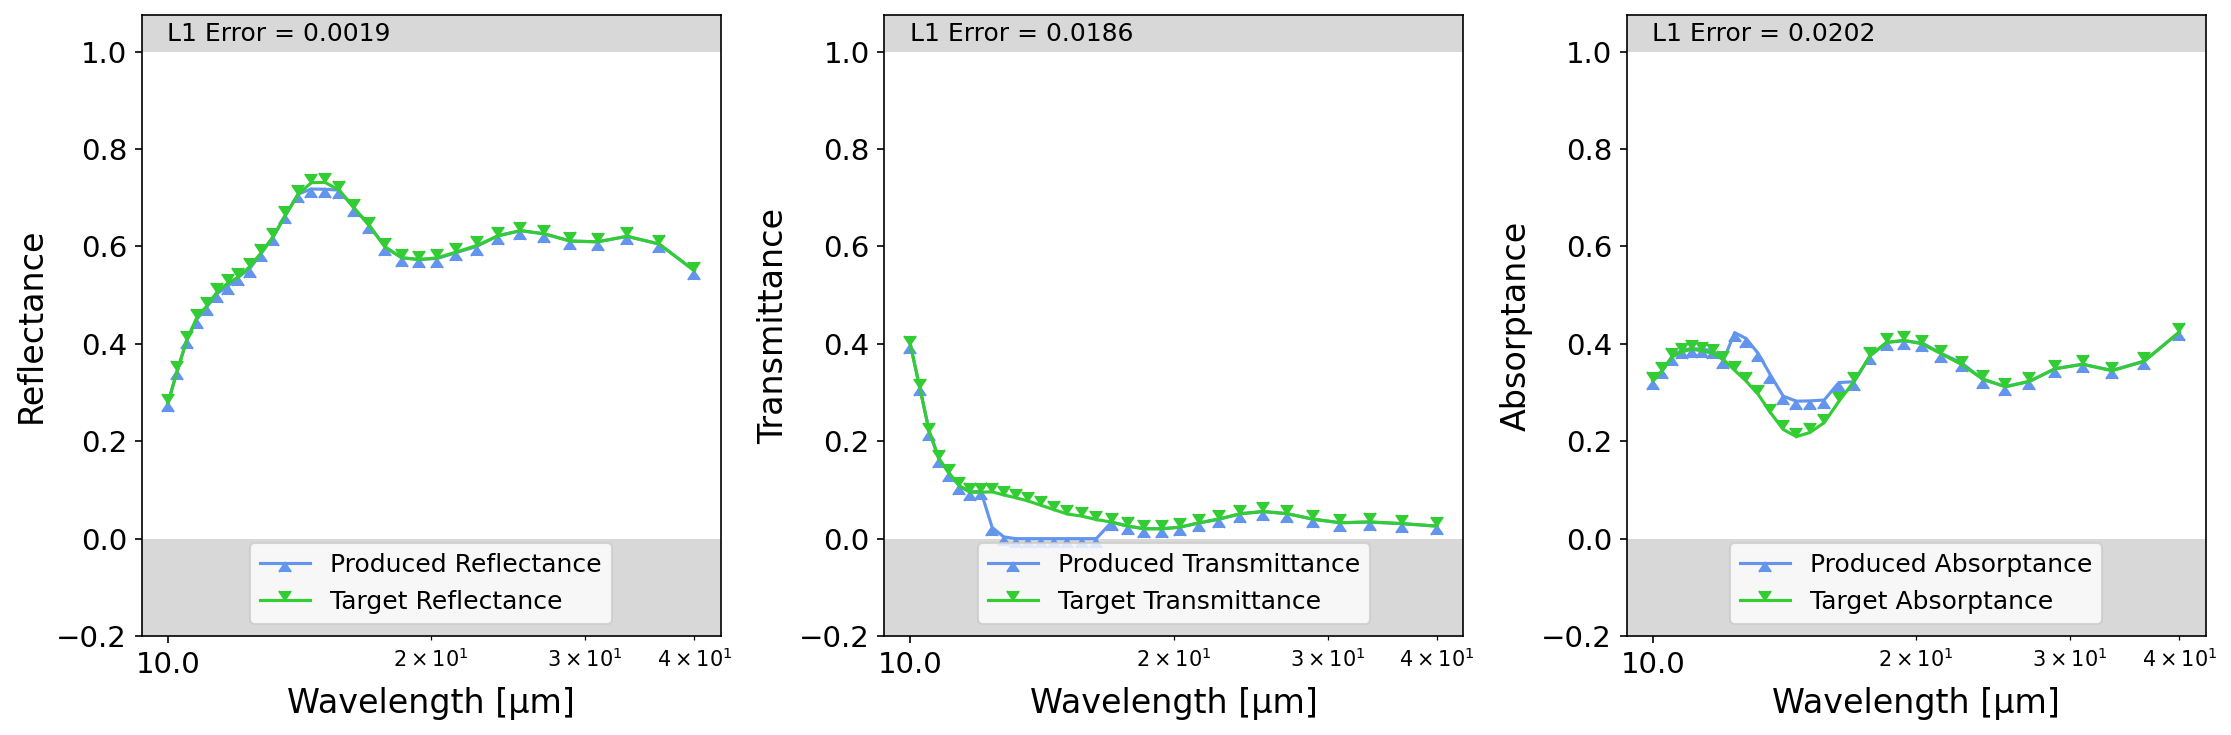

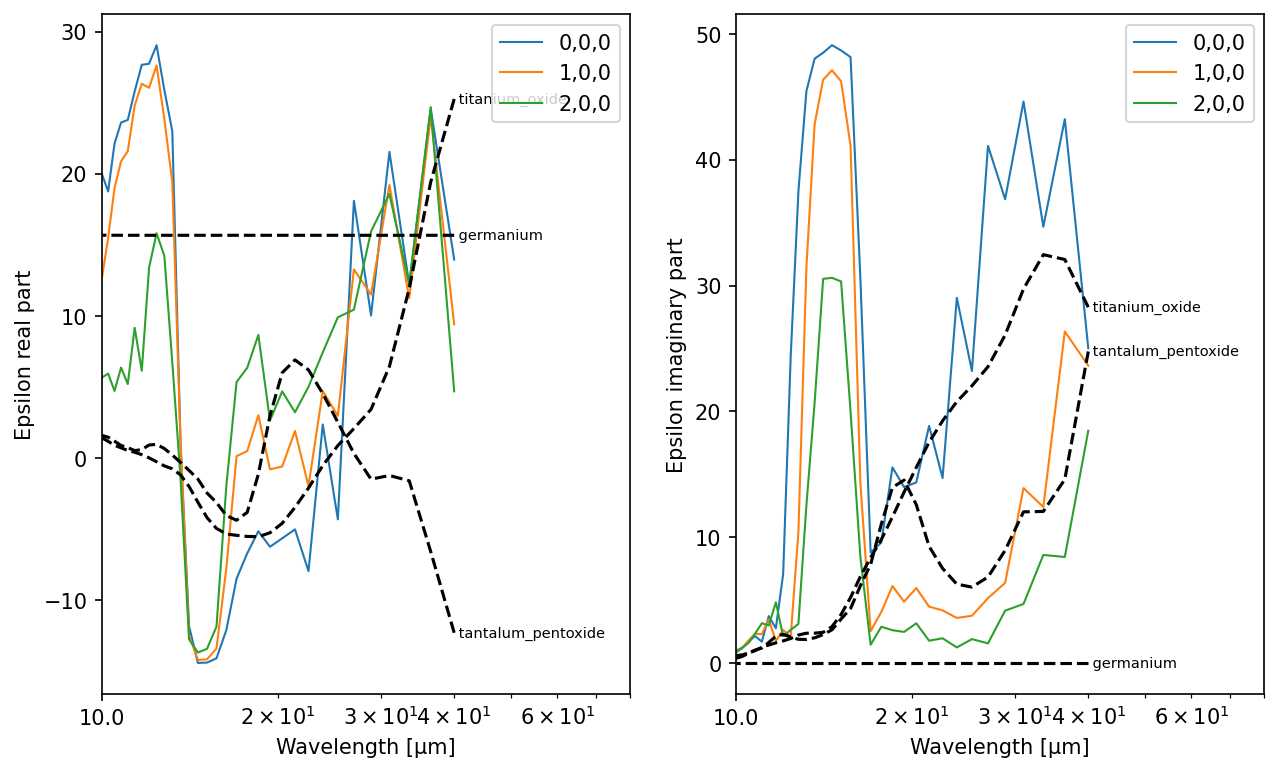

In [19]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium","tantalum_pentoxide"])

In [20]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model

cfg.type = "classification" # Choose type as described above (for now still regression)
cfg.iterations = 2000 # Set number of training iterations (that is forward model evaluations) to perform

In [21]:
nidn.run_training(cfg);

17:45:55|NIDN-INFO| ###  New Best=0.0956 with SpectrumLoss=0.0911 ### L1=0.0911
17:45:55|NIDN-INFO| It=0     Loss=0.0956   |  weighted_avg=0.0956  |  SpectrumLoss=0.0911 | L1=0.0911
17:45:56|NIDN-INFO| ###  New Best=0.0932 with SpectrumLoss=0.0887 ### L1=0.0887
17:45:56|NIDN-INFO| ###  New Best=0.0852 with SpectrumLoss=0.0806 ### L1=0.0806
17:45:57|NIDN-INFO| It=5     Loss=0.0881   |  weighted_avg=0.0916  |  SpectrumLoss=0.0836 | L1=0.0836
17:45:57|NIDN-INFO| ###  New Best=0.0829 with SpectrumLoss=0.0783 ### L1=0.0783
17:45:58|NIDN-INFO| ###  New Best=0.0817 with SpectrumLoss=0.0772 ### L1=0.0772
17:45:58|NIDN-INFO| It=10    Loss=0.0817   |  weighted_avg=0.0880  |  SpectrumLoss=0.0772 | L1=0.0772
17:45:58|NIDN-INFO| ###  New Best=0.0808 with SpectrumLoss=0.0762 ### L1=0.0762
17:45:59|NIDN-INFO| ###  New Best=0.0804 with SpectrumLoss=0.0759 ### L1=0.0759
17:45:59|NIDN-INFO| ###  New Best=0.0793 with SpectrumLoss=0.0747 ### L1=0.0747
17:45:59|NIDN-INFO| It=15    Loss=0.0793   |  weighted

17:46:15|NIDN-INFO| ###  New Best=0.0603 with SpectrumLoss=0.0594 ### L1=0.0594
17:46:16|NIDN-INFO| ###  New Best=0.0603 with SpectrumLoss=0.0594 ### L1=0.0594
17:46:16|NIDN-INFO| It=75    Loss=0.0603   |  weighted_avg=0.0620  |  SpectrumLoss=0.0594 | L1=0.0594
17:46:16|NIDN-INFO| ###  New Best=0.0599 with SpectrumLoss=0.0590 ### L1=0.0590
17:46:17|NIDN-INFO| ###  New Best=0.0598 with SpectrumLoss=0.0590 ### L1=0.0590
17:46:17|NIDN-INFO| ###  New Best=0.0597 with SpectrumLoss=0.0589 ### L1=0.0589
17:46:17|NIDN-INFO| It=80    Loss=0.0598   |  weighted_avg=0.0610  |  SpectrumLoss=0.0590 | L1=0.0590
17:46:18|NIDN-INFO| ###  New Best=0.0594 with SpectrumLoss=0.0586 ### L1=0.0586
17:46:19|NIDN-INFO| It=85    Loss=0.0595   |  weighted_avg=0.0603  |  SpectrumLoss=0.0588 | L1=0.0588
17:46:20|NIDN-INFO| ###  New Best=0.0592 with SpectrumLoss=0.0585 ### L1=0.0585
17:46:20|NIDN-INFO| ###  New Best=0.0591 with SpectrumLoss=0.0584 ### L1=0.0584
17:46:20|NIDN-INFO| It=90    Loss=0.0591   |  weighted

17:46:52|NIDN-INFO| It=205   Loss=0.0580   |  weighted_avg=0.0582  |  SpectrumLoss=0.0577 | L1=0.0577
17:46:53|NIDN-INFO| ###  New Best=0.0580 with SpectrumLoss=0.0577 ### L1=0.0577
17:46:53|NIDN-INFO| It=210   Loss=0.0580   |  weighted_avg=0.0581  |  SpectrumLoss=0.0577 | L1=0.0577
17:46:54|NIDN-INFO| ###  New Best=0.0580 with SpectrumLoss=0.0577 ### L1=0.0577
17:46:55|NIDN-INFO| It=215   Loss=0.0580   |  weighted_avg=0.0581  |  SpectrumLoss=0.0577 | L1=0.0577
17:46:55|NIDN-INFO| ###  New Best=0.0579 with SpectrumLoss=0.0576 ### L1=0.0576
17:46:56|NIDN-INFO| ###  New Best=0.0579 with SpectrumLoss=0.0576 ### L1=0.0576
17:46:56|NIDN-INFO| It=220   Loss=0.0579   |  weighted_avg=0.0580  |  SpectrumLoss=0.0576 | L1=0.0576
17:46:57|NIDN-INFO| ###  New Best=0.0579 with SpectrumLoss=0.0576 ### L1=0.0576
17:46:57|NIDN-INFO| It=225   Loss=0.0580   |  weighted_avg=0.0580  |  SpectrumLoss=0.0577 | L1=0.0577
17:46:58|NIDN-INFO| ###  New Best=0.0579 with SpectrumLoss=0.0576 ### L1=0.0576
17:46:58|N

17:47:33|NIDN-INFO| ###  New Best=0.0553 with SpectrumLoss=0.0541 ### L1=0.0541
17:47:33|NIDN-INFO| It=355   Loss=0.0553   |  weighted_avg=0.0557  |  SpectrumLoss=0.0541 | L1=0.0541
17:47:33|NIDN-INFO| ###  New Best=0.0552 with SpectrumLoss=0.0540 ### L1=0.0540
17:47:34|NIDN-INFO| ###  New Best=0.0552 with SpectrumLoss=0.0539 ### L1=0.0539
17:47:34|NIDN-INFO| ###  New Best=0.0551 with SpectrumLoss=0.0538 ### L1=0.0538
17:47:34|NIDN-INFO| ###  New Best=0.0550 with SpectrumLoss=0.0537 ### L1=0.0537
17:47:35|NIDN-INFO| ###  New Best=0.0550 with SpectrumLoss=0.0537 ### L1=0.0537
17:47:35|NIDN-INFO| It=360   Loss=0.0550   |  weighted_avg=0.0555  |  SpectrumLoss=0.0537 | L1=0.0537
17:47:35|NIDN-INFO| ###  New Best=0.0548 with SpectrumLoss=0.0535 ### L1=0.0535
17:47:36|NIDN-INFO| ###  New Best=0.0547 with SpectrumLoss=0.0534 ### L1=0.0534
17:47:36|NIDN-INFO| It=365   Loss=0.0547   |  weighted_avg=0.0552  |  SpectrumLoss=0.0534 | L1=0.0534
17:47:36|NIDN-INFO| ###  New Best=0.0545 with Spectrum

17:48:02|NIDN-INFO| ###  New Best=0.0359 with SpectrumLoss=0.0346 ### L1=0.0346
17:48:02|NIDN-INFO| It=460   Loss=0.0359   |  weighted_avg=0.0368  |  SpectrumLoss=0.0346 | L1=0.0346
17:48:04|NIDN-INFO| ###  New Best=0.0358 with SpectrumLoss=0.0345 ### L1=0.0345
17:48:04|NIDN-INFO| It=465   Loss=0.0358   |  weighted_avg=0.0365  |  SpectrumLoss=0.0345 | L1=0.0345
17:48:05|NIDN-INFO| ###  New Best=0.0357 with SpectrumLoss=0.0344 ### L1=0.0344
17:48:05|NIDN-INFO| It=470   Loss=0.0360   |  weighted_avg=0.0363  |  SpectrumLoss=0.0347 | L1=0.0347
17:48:06|NIDN-INFO| ###  New Best=0.0355 with SpectrumLoss=0.0343 ### L1=0.0343
17:48:07|NIDN-INFO| It=475   Loss=0.0358   |  weighted_avg=0.0361  |  SpectrumLoss=0.0346 | L1=0.0346
17:48:07|NIDN-INFO| ###  New Best=0.0355 with SpectrumLoss=0.0342 ### L1=0.0342
17:48:07|NIDN-INFO| ###  New Best=0.0354 with SpectrumLoss=0.0342 ### L1=0.0342
17:48:08|NIDN-INFO| ###  New Best=0.0354 with SpectrumLoss=0.0342 ### L1=0.0342
17:48:08|NIDN-INFO| It=480   Los

17:48:38|NIDN-INFO| ###  New Best=0.0337 with SpectrumLoss=0.0319 ### L1=0.0319
17:48:39|NIDN-INFO| It=590   Loss=0.0337   |  weighted_avg=0.0340  |  SpectrumLoss=0.0320 | L1=0.0320
17:48:40|NIDN-INFO| It=595   Loss=0.0339   |  weighted_avg=0.0339  |  SpectrumLoss=0.0321 | L1=0.0321
17:48:41|NIDN-INFO| ###  New Best=0.0336 with SpectrumLoss=0.0318 ### L1=0.0318
17:48:41|NIDN-INFO| It=600   Loss=0.0336   |  weighted_avg=0.0338  |  SpectrumLoss=0.0318 | L1=0.0318
17:48:42|NIDN-INFO| ###  New Best=0.0336 with SpectrumLoss=0.0318 ### L1=0.0318
17:48:42|NIDN-INFO| ###  New Best=0.0335 with SpectrumLoss=0.0318 ### L1=0.0318
17:48:43|NIDN-INFO| It=605   Loss=0.0335   |  weighted_avg=0.0337  |  SpectrumLoss=0.0318 | L1=0.0318
17:48:44|NIDN-INFO| It=610   Loss=0.0336   |  weighted_avg=0.0336  |  SpectrumLoss=0.0319 | L1=0.0319
17:48:45|NIDN-INFO| ###  New Best=0.0335 with SpectrumLoss=0.0317 ### L1=0.0317
17:48:46|NIDN-INFO| It=615   Loss=0.0336   |  weighted_avg=0.0336  |  SpectrumLoss=0.0319 

17:49:19|NIDN-INFO| ###  New Best=0.0307 with SpectrumLoss=0.0293 ### L1=0.0293
17:49:20|NIDN-INFO| ###  New Best=0.0303 with SpectrumLoss=0.0290 ### L1=0.0290
17:49:20|NIDN-INFO| It=740   Loss=0.0306   |  weighted_avg=0.0315  |  SpectrumLoss=0.0294 | L1=0.0294
17:49:21|NIDN-INFO| ###  New Best=0.0300 with SpectrumLoss=0.0289 ### L1=0.0289
17:49:21|NIDN-INFO| ###  New Best=0.0297 with SpectrumLoss=0.0286 ### L1=0.0286
17:49:21|NIDN-INFO| ###  New Best=0.0295 with SpectrumLoss=0.0285 ### L1=0.0285
17:49:22|NIDN-INFO| ###  New Best=0.0294 with SpectrumLoss=0.0285 ### L1=0.0285
17:49:22|NIDN-INFO| It=745   Loss=0.0294   |  weighted_avg=0.0309  |  SpectrumLoss=0.0285 | L1=0.0285
17:49:22|NIDN-INFO| ###  New Best=0.0289 with SpectrumLoss=0.0281 ### L1=0.0281
17:49:23|NIDN-INFO| It=750   Loss=0.0292   |  weighted_avg=0.0302  |  SpectrumLoss=0.0284 | L1=0.0284
17:49:23|NIDN-INFO| ###  New Best=0.0285 with SpectrumLoss=0.0278 ### L1=0.0278
17:49:24|NIDN-INFO| ###  New Best=0.0283 with Spectrum

17:49:44|NIDN-INFO| ###  New Best=0.0257 with SpectrumLoss=0.0249 ### L1=0.0249
17:49:44|NIDN-INFO| ###  New Best=0.0255 with SpectrumLoss=0.0247 ### L1=0.0247
17:49:44|NIDN-INFO| It=825   Loss=0.0255   |  weighted_avg=0.0262  |  SpectrumLoss=0.0247 | L1=0.0247
17:49:44|NIDN-INFO| ###  New Best=0.0255 with SpectrumLoss=0.0246 ### L1=0.0246
17:49:45|NIDN-INFO| ###  New Best=0.0252 with SpectrumLoss=0.0243 ### L1=0.0243
17:49:45|NIDN-INFO| ###  New Best=0.0251 with SpectrumLoss=0.0241 ### L1=0.0241
17:49:45|NIDN-INFO| ###  New Best=0.0248 with SpectrumLoss=0.0238 ### L1=0.0238
17:49:45|NIDN-INFO| ###  New Best=0.0245 with SpectrumLoss=0.0235 ### L1=0.0235
17:49:45|NIDN-INFO| It=830   Loss=0.0245   |  weighted_avg=0.0258  |  SpectrumLoss=0.0235 | L1=0.0235
17:49:46|NIDN-INFO| ###  New Best=0.0242 with SpectrumLoss=0.0230 ### L1=0.0230
17:49:46|NIDN-INFO| ###  New Best=0.0238 with SpectrumLoss=0.0225 ### L1=0.0225
17:49:46|NIDN-INFO| ###  New Best=0.0232 with SpectrumLoss=0.0219 ### L1=0.0

17:50:01|NIDN-INFO| ###  New Best=0.0024 with SpectrumLoss=0.0022 ### L1=0.0022
17:50:01|NIDN-INFO| ###  New Best=0.0024 with SpectrumLoss=0.0022 ### L1=0.0022
17:50:01|NIDN-INFO| ###  New Best=0.0023 with SpectrumLoss=0.0022 ### L1=0.0022
17:50:02|NIDN-INFO| ###  New Best=0.0023 with SpectrumLoss=0.0021 ### L1=0.0021
17:50:02|NIDN-INFO| ###  New Best=0.0023 with SpectrumLoss=0.0021 ### L1=0.0021
17:50:02|NIDN-INFO| It=890   Loss=0.0023   |  weighted_avg=0.0026  |  SpectrumLoss=0.0021 | L1=0.0021
17:50:02|NIDN-INFO| ###  New Best=0.0022 with SpectrumLoss=0.0021 ### L1=0.0021
17:50:03|NIDN-INFO| ###  New Best=0.0022 with SpectrumLoss=0.0021 ### L1=0.0021
17:50:03|NIDN-INFO| ###  New Best=0.0022 with SpectrumLoss=0.0020 ### L1=0.0020
17:50:03|NIDN-INFO| ###  New Best=0.0021 with SpectrumLoss=0.0020 ### L1=0.0020
17:50:03|NIDN-INFO| ###  New Best=0.0021 with SpectrumLoss=0.0020 ### L1=0.0020
17:50:03|NIDN-INFO| It=895   Loss=0.0021   |  weighted_avg=0.0024  |  SpectrumLoss=0.0020 | L1=0.0

17:50:18|NIDN-INFO| ###  New Best=0.0013 with SpectrumLoss=0.0012 ### L1=0.0012
17:50:19|NIDN-INFO| ###  New Best=0.0013 with SpectrumLoss=0.0012 ### L1=0.0012
17:50:19|NIDN-INFO| It=950   Loss=0.0013   |  weighted_avg=0.0014  |  SpectrumLoss=0.0012 | L1=0.0012
17:50:19|NIDN-INFO| ###  New Best=0.0013 with SpectrumLoss=0.0012 ### L1=0.0012
17:50:19|NIDN-INFO| ###  New Best=0.0013 with SpectrumLoss=0.0012 ### L1=0.0012
17:50:20|NIDN-INFO| ###  New Best=0.0013 with SpectrumLoss=0.0012 ### L1=0.0012
17:50:20|NIDN-INFO| ###  New Best=0.0013 with SpectrumLoss=0.0012 ### L1=0.0012
17:50:20|NIDN-INFO| ###  New Best=0.0013 with SpectrumLoss=0.0012 ### L1=0.0012
17:50:20|NIDN-INFO| It=955   Loss=0.0013   |  weighted_avg=0.0014  |  SpectrumLoss=0.0012 | L1=0.0012
17:50:20|NIDN-INFO| ###  New Best=0.0013 with SpectrumLoss=0.0012 ### L1=0.0012
17:50:21|NIDN-INFO| ###  New Best=0.0013 with SpectrumLoss=0.0012 ### L1=0.0012
17:50:21|NIDN-INFO| ###  New Best=0.0012 with SpectrumLoss=0.0012 ### L1=0.0

17:50:36|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
17:50:36|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
17:50:36|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
17:50:36|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0009 ### L1=0.0009
17:50:37|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
17:50:37|NIDN-INFO| It=1015  Loss=0.0009   |  weighted_avg=0.0010  |  SpectrumLoss=0.0008 | L1=0.0008
17:50:37|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
17:50:37|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
17:50:38|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
17:50:38|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
17:50:38|NIDN-INFO| ###  New Best=0.0009 with SpectrumLoss=0.0008 ### L1=0.0008
17:50:38|NIDN-INFO| It=1020  Loss=0.0009   |  weighted_avg=0.0009  |  SpectrumLoss=0.0008 | L1=0.0

17:50:53|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0007 ### L1=0.0007
17:50:53|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0007 ### L1=0.0007
17:50:53|NIDN-INFO| It=1075  Loss=0.0007   |  weighted_avg=0.0007  |  SpectrumLoss=0.0007 | L1=0.0007
17:50:54|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0007 ### L1=0.0007
17:50:54|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0007 ### L1=0.0007
17:50:54|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0007 ### L1=0.0007
17:50:54|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0006 ### L1=0.0006
17:50:55|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0006 ### L1=0.0006
17:50:55|NIDN-INFO| It=1080  Loss=0.0007   |  weighted_avg=0.0007  |  SpectrumLoss=0.0006 | L1=0.0006
17:50:55|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0006 ### L1=0.0006
17:50:55|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0006 ### L1=0.0006
17:50:56|NIDN-INFO| ###  New Best=0.0007 with SpectrumLoss=0.0006 ### L1=0.0

17:51:13|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:13|NIDN-INFO| It=1145  Loss=0.0006   |  weighted_avg=0.0006  |  SpectrumLoss=0.0005 | L1=0.0005
17:51:13|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:13|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:14|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:14|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:14|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:14|NIDN-INFO| It=1150  Loss=0.0006   |  weighted_avg=0.0006  |  SpectrumLoss=0.0005 | L1=0.0005
17:51:14|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:15|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:15|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:15|NIDN-INFO| ###  New Best=0.0006 with SpectrumLoss=0.0005 ### L1=0.0

17:51:30|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:30|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:30|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0005 ### L1=0.0005
17:51:31|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:31|NIDN-INFO| It=1210  Loss=0.0005   |  weighted_avg=0.0005  |  SpectrumLoss=0.0004 | L1=0.0004
17:51:31|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:31|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:32|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:32|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:32|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:32|NIDN-INFO| It=1215  Loss=0.0005   |  weighted_avg=0.0005  |  SpectrumLoss=0.0004 | L1=0.0004
17:51:32|NIDN-INFO| ###  New Best=0.0005 with SpectrumLoss=0.0004 ### L1=0.0

17:51:47|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:47|NIDN-INFO| It=1270  Loss=0.0004   |  weighted_avg=0.0004  |  SpectrumLoss=0.0004 | L1=0.0004
17:51:48|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:48|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:48|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:49|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:49|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:49|NIDN-INFO| It=1275  Loss=0.0004   |  weighted_avg=0.0004  |  SpectrumLoss=0.0004 | L1=0.0004
17:51:49|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:49|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:50|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0004
17:51:50|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0004 ### L1=0.0

17:52:05|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:05|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:05|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:05|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:05|NIDN-INFO| It=1335  Loss=0.0004   |  weighted_avg=0.0004  |  SpectrumLoss=0.0003 | L1=0.0003
17:52:06|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:06|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:06|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:07|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:07|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:07|NIDN-INFO| It=1340  Loss=0.0004   |  weighted_avg=0.0004  |  SpectrumLoss=0.0003 | L1=0.0003
17:52:07|NIDN-INFO| ###  New Best=0.0004 with SpectrumLoss=0.0003 ### L1=0.0

17:52:22|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:22|NIDN-INFO| It=1395  Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0003 | L1=0.0003
17:52:22|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:23|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:23|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:23|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:24|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:24|NIDN-INFO| It=1400  Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0003 | L1=0.0003
17:52:24|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:24|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:24|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:25|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0

17:52:39|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:40|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:40|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:40|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:40|NIDN-INFO| It=1460  Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0003 | L1=0.0003
17:52:40|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:41|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:41|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:41|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:42|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0003
17:52:42|NIDN-INFO| It=1465  Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0003 | L1=0.0003
17:52:42|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0003 ### L1=0.0

17:52:57|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:52:57|NIDN-INFO| It=1520  Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0002 | L1=0.0002
17:52:57|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:52:57|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:52:58|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:52:58|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:52:58|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:52:58|NIDN-INFO| It=1525  Loss=0.0003   |  weighted_avg=0.0003  |  SpectrumLoss=0.0002 | L1=0.0002
17:52:59|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:52:59|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:52:59|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0002
17:52:59|NIDN-INFO| ###  New Best=0.0003 with SpectrumLoss=0.0002 ### L1=0.0

17:53:14|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:14|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:15|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:15|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:15|NIDN-INFO| It=1585  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:53:15|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:16|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:16|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:16|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:16|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:16|NIDN-INFO| It=1590  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:53:17|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

17:53:32|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:32|NIDN-INFO| It=1645  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:53:32|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:32|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:33|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:33|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:33|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:33|NIDN-INFO| It=1650  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:53:33|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:34|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:34|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:34|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

17:53:49|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:49|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:50|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:50|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:50|NIDN-INFO| It=1710  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:53:50|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:50|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:51|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:51|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:51|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:53:51|NIDN-INFO| It=1715  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:53:52|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

17:54:06|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:06|NIDN-INFO| It=1770  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:54:07|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:07|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:07|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:08|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:08|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:08|NIDN-INFO| It=1775  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:54:08|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:08|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:09|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:09|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

17:54:24|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:24|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:24|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:24|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:24|NIDN-INFO| It=1835  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:54:25|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:25|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:25|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:26|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:26|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0002
17:54:26|NIDN-INFO| It=1840  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0002 | L1=0.0002
17:54:26|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0002 ### L1=0.0

17:54:41|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:41|NIDN-INFO| It=1895  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0001 | L1=0.0001
17:54:42|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:42|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:42|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:42|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:43|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:43|NIDN-INFO| It=1900  Loss=0.0002   |  weighted_avg=0.0002  |  SpectrumLoss=0.0001 | L1=0.0001
17:54:43|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:43|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:44|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:44|NIDN-INFO| ###  New Best=0.0002 with SpectrumLoss=0.0001 ### L1=0.0

17:54:59|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:59|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:59|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:59|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:54:59|NIDN-INFO| It=1960  Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:55:00|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:55:00|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:55:00|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:55:01|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:55:01|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0001
17:55:01|NIDN-INFO| It=1965  Loss=0.0001   |  weighted_avg=0.0001  |  SpectrumLoss=0.0001 | L1=0.0001
17:55:01|NIDN-INFO| ###  New Best=0.0001 with SpectrumLoss=0.0001 ### L1=0.0

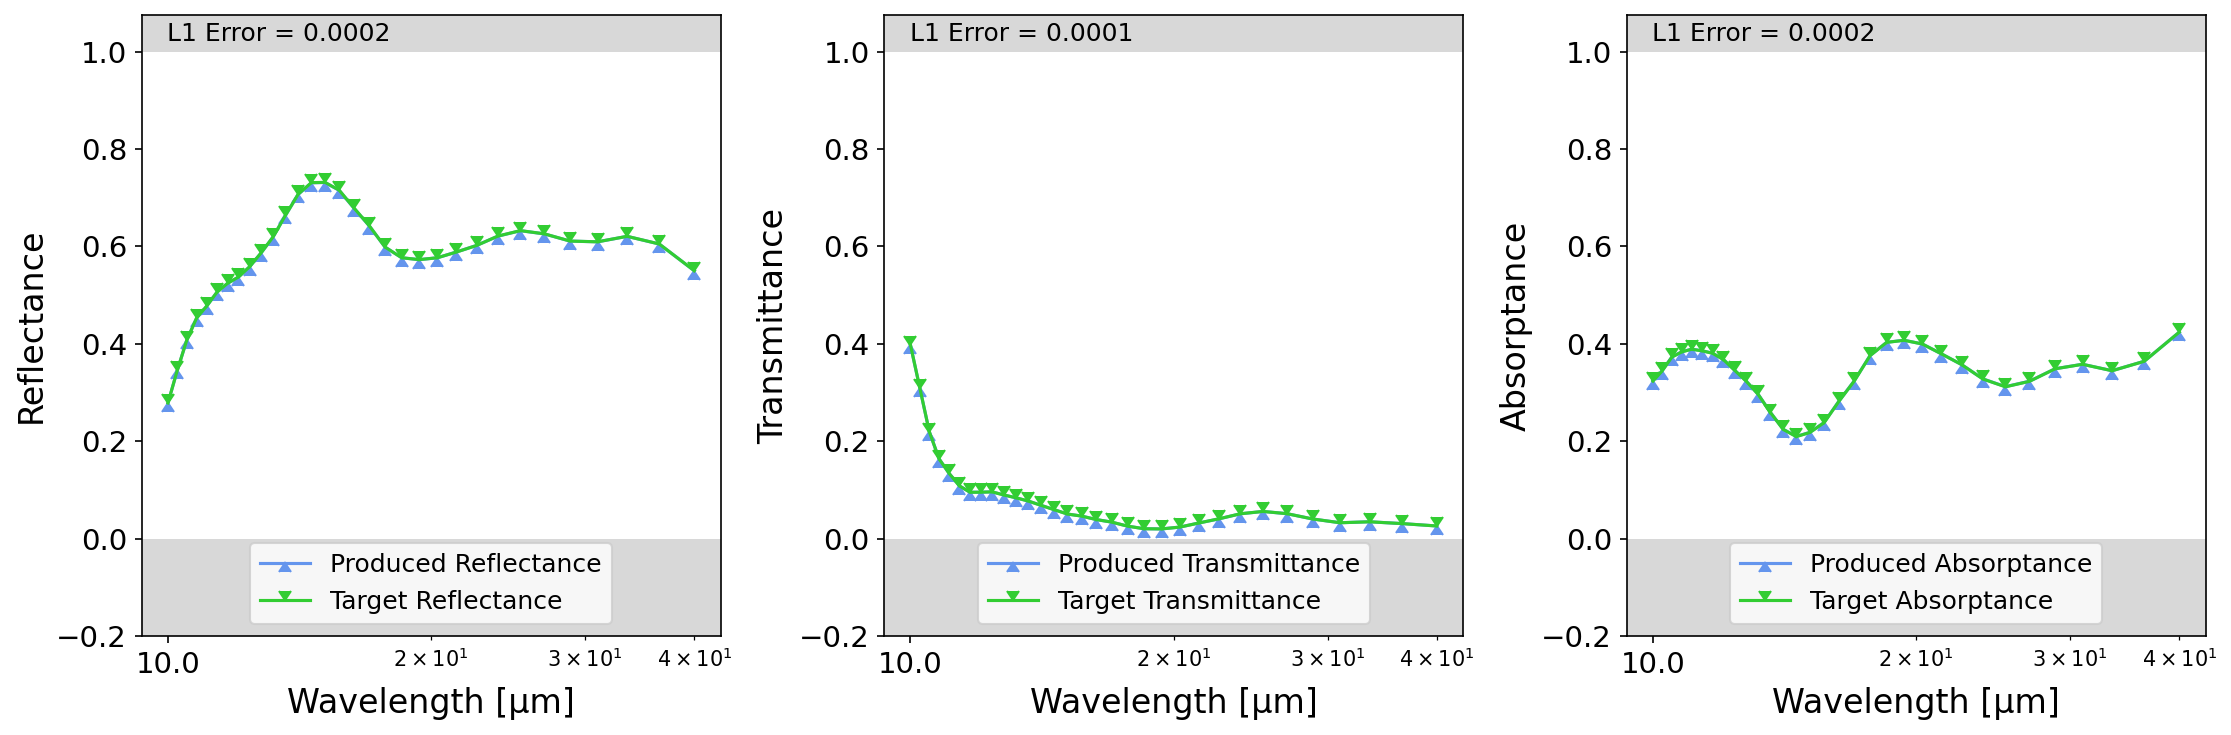

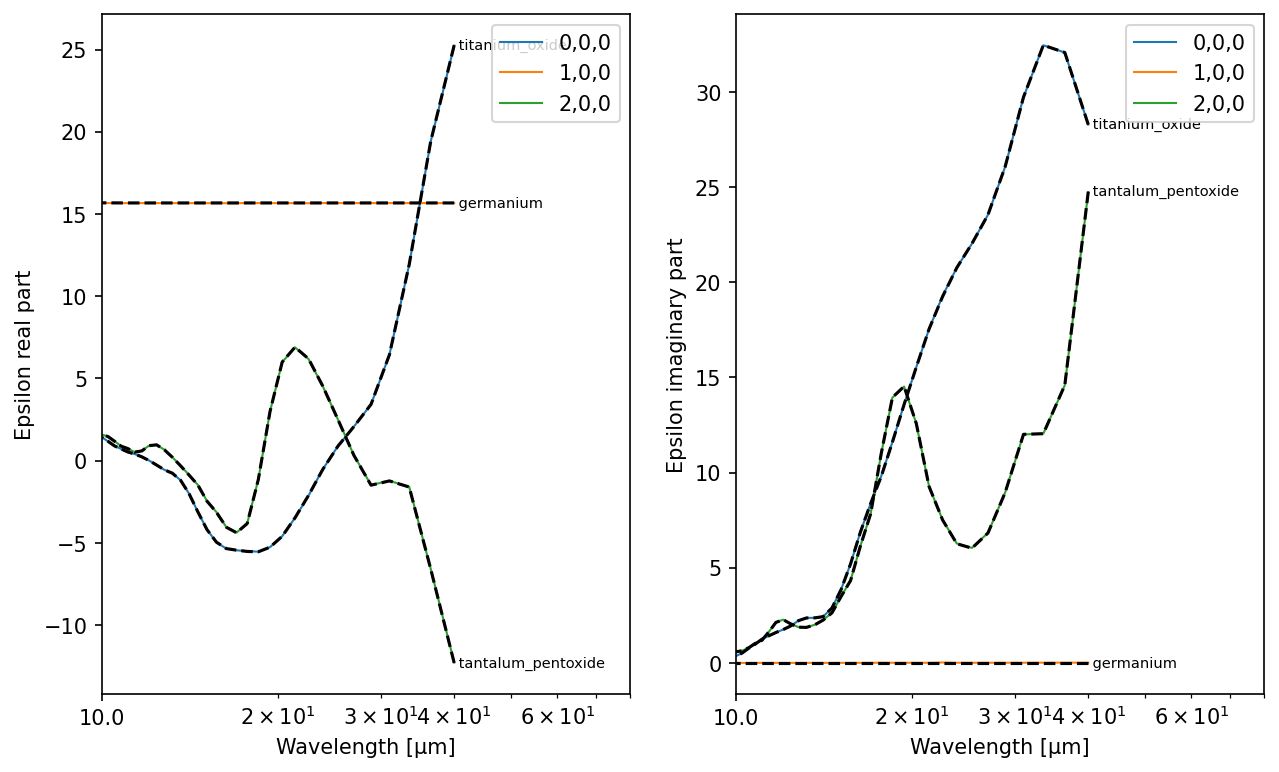

In [22]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium","tantalum_pentoxide"])

## Patterned 2-Layer Ground-truth  

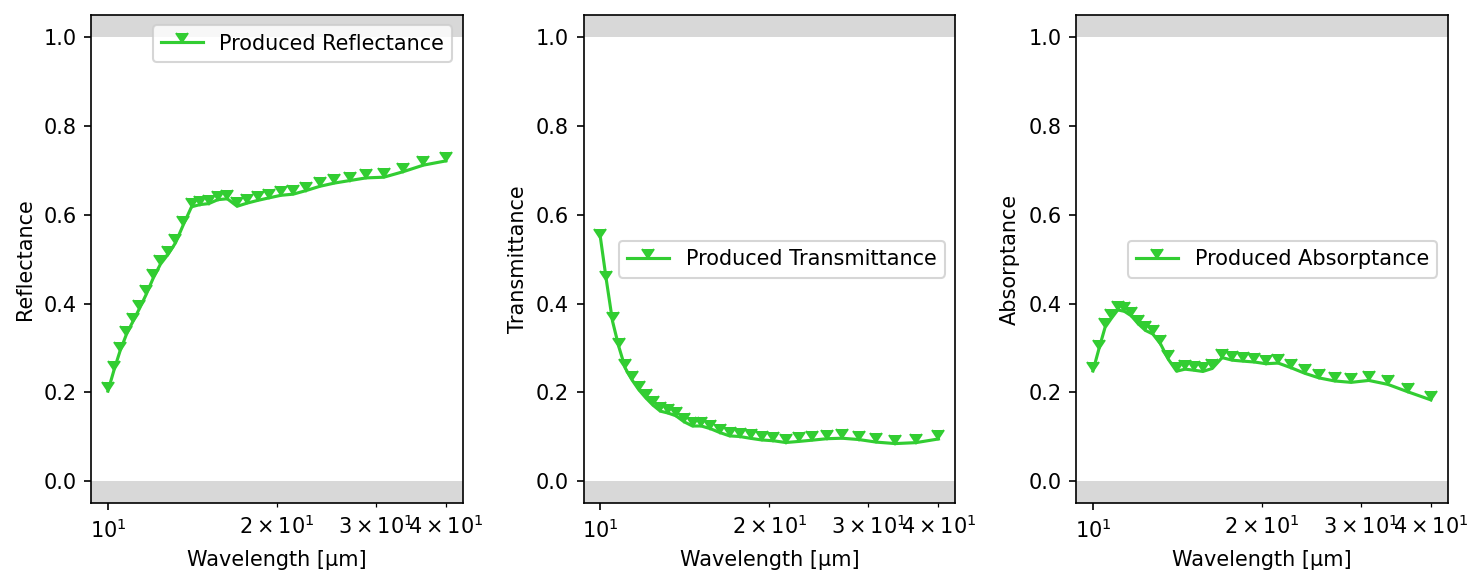

In [23]:
# Start with the default config
cfg = nidn.load_default_cfg()

# Set grid specifics
cfg.Nx = 9
cfg.Ny = 9
cfg.N_layers = 2
cfg.N_freq = 32
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.TRCWA_NG = 11
cfg.TRCWA_PER_LAYER_THICKNESS = [1.0]
cfg.freq_distribution = "linear"
cfg.eps_oversampling = 3

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 1e-5
cfg.physical_wavelength_range[1] = 4e-5

cfg.target_reflectance_spectrum = [0.72146591,0.71193585,0.69688580,0.68471162,0.68321263,0.67718495,0.67148982,0.66422884,0.65468071,0.64655265,0.64397645,0.63830631,0.63271241,0.62653758,0.61929966,0.63616737,0.63414681,0.62530630,0.62306013,0.61810335,0.57788331,0.53668584,0.51044783,0.48864278,0.45720842,0.42071896,0.38852309,0.35924907,0.33016955,0.29327708,0.24971534,0.20306948,]
cfg.target_transmittance_spectrum = [0.09529088,0.08701979,0.08487915,0.08820517,0.09402882,0.09692681,0.09588794,0.09259806,0.08971527,0.08728596,0.09126103,0.09306543,0.09673880,0.10076259,0.10221293,0.10974814,0.11852910,0.12450939,0.12444901,0.13400195,0.14754551,0.15371483,0.15796944,0.17153857,0.18808333,0.20653083,0.22874379,0.25488962,0.30312948,0.36037275,0.45226944,0.54843907,]


nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

In [24]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model
cfg.real_min_eps = -15.0
cfg.real_max_eps = 30.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 50.0

cfg.type = "regression" # Choose type as described above (for now still regression)
cfg.iterations = 2000 # Set number of training iterations (that is forward model evaluations) to perform

In [25]:
nidn.run_training(cfg);

17:55:14|NIDN-INFO| ###  New Best=0.1483 with SpectrumLoss=0.1483 ### L1=0.1483
17:55:14|NIDN-INFO| It=0     Loss=0.1483   |  weighted_avg=0.1483  |  SpectrumLoss=0.1483 | L1=0.1483
17:55:15|NIDN-INFO| ###  New Best=0.1413 with SpectrumLoss=0.1413 ### L1=0.1413
17:55:16|NIDN-INFO| ###  New Best=0.1352 with SpectrumLoss=0.1352 ### L1=0.1352
17:55:18|NIDN-INFO| ###  New Best=0.1295 with SpectrumLoss=0.1295 ### L1=0.1295
17:55:19|NIDN-INFO| ###  New Best=0.1243 with SpectrumLoss=0.1243 ### L1=0.1243
17:55:20|NIDN-INFO| ###  New Best=0.1195 with SpectrumLoss=0.1195 ### L1=0.1195
17:55:20|NIDN-INFO| It=5     Loss=0.1195   |  weighted_avg=0.1330  |  SpectrumLoss=0.1195 | L1=0.1195
17:55:21|NIDN-INFO| ###  New Best=0.1166 with SpectrumLoss=0.1166 ### L1=0.1166
17:55:22|NIDN-INFO| ###  New Best=0.1145 with SpectrumLoss=0.1145 ### L1=0.1145
17:55:24|NIDN-INFO| ###  New Best=0.1125 with SpectrumLoss=0.1125 ### L1=0.1125
17:55:25|NIDN-INFO| ###  New Best=0.1105 with SpectrumLoss=0.1105 ### L1=0.1

17:56:36|NIDN-INFO| ###  New Best=0.0337 with SpectrumLoss=0.0337 ### L1=0.0337
17:56:39|NIDN-INFO| ###  New Best=0.0333 with SpectrumLoss=0.0333 ### L1=0.0333
17:56:39|NIDN-INFO| It=70    Loss=0.0333   |  weighted_avg=0.0376  |  SpectrumLoss=0.0333 | L1=0.0333
17:56:40|NIDN-INFO| ###  New Best=0.0326 with SpectrumLoss=0.0326 ### L1=0.0326
17:56:41|NIDN-INFO| ###  New Best=0.0321 with SpectrumLoss=0.0321 ### L1=0.0321
17:56:42|NIDN-INFO| ###  New Best=0.0312 with SpectrumLoss=0.0312 ### L1=0.0312
17:56:44|NIDN-INFO| ###  New Best=0.0310 with SpectrumLoss=0.0310 ### L1=0.0310
17:56:45|NIDN-INFO| ###  New Best=0.0307 with SpectrumLoss=0.0307 ### L1=0.0307
17:56:45|NIDN-INFO| It=75    Loss=0.0307   |  weighted_avg=0.0352  |  SpectrumLoss=0.0307 | L1=0.0307
17:56:46|NIDN-INFO| ###  New Best=0.0305 with SpectrumLoss=0.0305 ### L1=0.0305
17:56:49|NIDN-INFO| ###  New Best=0.0303 with SpectrumLoss=0.0303 ### L1=0.0303
17:56:50|NIDN-INFO| ###  New Best=0.0293 with SpectrumLoss=0.0293 ### L1=0.0

17:58:40|NIDN-INFO| It=170   Loss=0.0197   |  weighted_avg=0.0200  |  SpectrumLoss=0.0197 | L1=0.0197
17:58:46|NIDN-INFO| It=175   Loss=0.0196   |  weighted_avg=0.0199  |  SpectrumLoss=0.0196 | L1=0.0196
17:58:47|NIDN-INFO| ###  New Best=0.0195 with SpectrumLoss=0.0195 ### L1=0.0195
17:58:48|NIDN-INFO| ###  New Best=0.0194 with SpectrumLoss=0.0194 ### L1=0.0194
17:58:51|NIDN-INFO| ###  New Best=0.0189 with SpectrumLoss=0.0189 ### L1=0.0189
17:58:52|NIDN-INFO| It=180   Loss=0.0189   |  weighted_avg=0.0198  |  SpectrumLoss=0.0189 | L1=0.0189
17:58:54|NIDN-INFO| ###  New Best=0.0186 with SpectrumLoss=0.0186 ### L1=0.0186
17:58:57|NIDN-INFO| ###  New Best=0.0186 with SpectrumLoss=0.0186 ### L1=0.0186
17:58:58|NIDN-INFO| ###  New Best=0.0185 with SpectrumLoss=0.0185 ### L1=0.0185
17:58:58|NIDN-INFO| It=185   Loss=0.0185   |  weighted_avg=0.0194  |  SpectrumLoss=0.0185 | L1=0.0185
17:58:59|NIDN-INFO| ###  New Best=0.0180 with SpectrumLoss=0.0180 ### L1=0.0180
17:59:01|NIDN-INFO| ###  New Bes

18:01:43|NIDN-INFO| It=320   Loss=0.0130   |  weighted_avg=0.0131  |  SpectrumLoss=0.0130 | L1=0.0130
18:01:49|NIDN-INFO| It=325   Loss=0.0136   |  weighted_avg=0.0130  |  SpectrumLoss=0.0136 | L1=0.0136
18:01:55|NIDN-INFO| It=330   Loss=0.0125   |  weighted_avg=0.0130  |  SpectrumLoss=0.0125 | L1=0.0125
18:02:01|NIDN-INFO| It=335   Loss=0.0132   |  weighted_avg=0.0130  |  SpectrumLoss=0.0132 | L1=0.0132
18:02:07|NIDN-INFO| It=340   Loss=0.0130   |  weighted_avg=0.0131  |  SpectrumLoss=0.0130 | L1=0.0130
18:02:14|NIDN-INFO| It=345   Loss=0.0129   |  weighted_avg=0.0130  |  SpectrumLoss=0.0129 | L1=0.0129
18:02:20|NIDN-INFO| It=350   Loss=0.0130   |  weighted_avg=0.0130  |  SpectrumLoss=0.0130 | L1=0.0130
18:02:26|NIDN-INFO| It=355   Loss=0.0127   |  weighted_avg=0.0130  |  SpectrumLoss=0.0127 | L1=0.0127
18:02:32|NIDN-INFO| It=360   Loss=0.0126   |  weighted_avg=0.0129  |  SpectrumLoss=0.0126 | L1=0.0126
18:02:38|NIDN-INFO| ###  New Best=0.0122 with SpectrumLoss=0.0122 ### L1=0.0122
18

18:05:27|NIDN-INFO| It=505   Loss=0.0082   |  weighted_avg=0.0079  |  SpectrumLoss=0.0082 | L1=0.0082
18:05:33|NIDN-INFO| It=510   Loss=0.0079   |  weighted_avg=0.0080  |  SpectrumLoss=0.0079 | L1=0.0079
18:05:38|NIDN-INFO| ###  New Best=0.0072 with SpectrumLoss=0.0072 ### L1=0.0072
18:05:39|NIDN-INFO| It=515   Loss=0.0086   |  weighted_avg=0.0080  |  SpectrumLoss=0.0086 | L1=0.0086
18:05:45|NIDN-INFO| It=520   Loss=0.0088   |  weighted_avg=0.0081  |  SpectrumLoss=0.0088 | L1=0.0088
18:05:51|NIDN-INFO| It=525   Loss=0.0085   |  weighted_avg=0.0084  |  SpectrumLoss=0.0085 | L1=0.0085
18:05:57|NIDN-INFO| It=530   Loss=0.0078   |  weighted_avg=0.0084  |  SpectrumLoss=0.0078 | L1=0.0078
18:06:03|NIDN-INFO| It=535   Loss=0.0085   |  weighted_avg=0.0084  |  SpectrumLoss=0.0085 | L1=0.0085
18:06:09|NIDN-INFO| It=540   Loss=0.0084   |  weighted_avg=0.0083  |  SpectrumLoss=0.0084 | L1=0.0084
18:06:15|NIDN-INFO| It=545   Loss=0.0080   |  weighted_avg=0.0081  |  SpectrumLoss=0.0080 | L1=0.0080
18

18:10:50|NIDN-INFO| ###  New Best=0.0060 with SpectrumLoss=0.0060 ### L1=0.0060
18:10:50|NIDN-INFO| It=770   Loss=0.0060   |  weighted_avg=0.0067  |  SpectrumLoss=0.0060 | L1=0.0060
18:10:52|NIDN-INFO| ###  New Best=0.0060 with SpectrumLoss=0.0060 ### L1=0.0060
18:10:53|NIDN-INFO| ###  New Best=0.0059 with SpectrumLoss=0.0059 ### L1=0.0059
18:10:56|NIDN-INFO| It=775   Loss=0.0060   |  weighted_avg=0.0065  |  SpectrumLoss=0.0060 | L1=0.0060
18:10:57|NIDN-INFO| ###  New Best=0.0056 with SpectrumLoss=0.0056 ### L1=0.0056
18:11:02|NIDN-INFO| It=780   Loss=0.0058   |  weighted_avg=0.0061  |  SpectrumLoss=0.0058 | L1=0.0058
18:11:07|NIDN-INFO| It=785   Loss=0.0058   |  weighted_avg=0.0060  |  SpectrumLoss=0.0058 | L1=0.0058
18:11:13|NIDN-INFO| It=790   Loss=0.0056   |  weighted_avg=0.0059  |  SpectrumLoss=0.0056 | L1=0.0056
18:11:14|NIDN-INFO| ###  New Best=0.0054 with SpectrumLoss=0.0054 ### L1=0.0054
18:11:19|NIDN-INFO| It=795   Loss=0.0057   |  weighted_avg=0.0058  |  SpectrumLoss=0.0057 

18:15:43|NIDN-INFO| It=1020  Loss=0.0040   |  weighted_avg=0.0046  |  SpectrumLoss=0.0040 | L1=0.0040
18:15:49|NIDN-INFO| It=1025  Loss=0.0041   |  weighted_avg=0.0045  |  SpectrumLoss=0.0041 | L1=0.0041
18:15:55|NIDN-INFO| It=1030  Loss=0.0044   |  weighted_avg=0.0044  |  SpectrumLoss=0.0044 | L1=0.0044
18:16:00|NIDN-INFO| It=1035  Loss=0.0045   |  weighted_avg=0.0043  |  SpectrumLoss=0.0045 | L1=0.0045
18:16:04|NIDN-INFO| ###  New Best=0.0038 with SpectrumLoss=0.0038 ### L1=0.0038
18:16:06|NIDN-INFO| ###  New Best=0.0037 with SpectrumLoss=0.0037 ### L1=0.0037
18:16:06|NIDN-INFO| It=1040  Loss=0.0037   |  weighted_avg=0.0043  |  SpectrumLoss=0.0037 | L1=0.0037
18:16:10|NIDN-INFO| ###  New Best=0.0035 with SpectrumLoss=0.0035 ### L1=0.0035
18:16:12|NIDN-INFO| It=1045  Loss=0.0037   |  weighted_avg=0.0041  |  SpectrumLoss=0.0037 | L1=0.0037
18:16:14|NIDN-INFO| ###  New Best=0.0032 with SpectrumLoss=0.0032 ### L1=0.0032
18:16:18|NIDN-INFO| It=1050  Loss=0.0040   |  weighted_avg=0.0040  |

18:21:19|NIDN-INFO| It=1310  Loss=0.0035   |  weighted_avg=0.0032  |  SpectrumLoss=0.0035 | L1=0.0035
18:21:25|NIDN-INFO| It=1315  Loss=0.0031   |  weighted_avg=0.0032  |  SpectrumLoss=0.0031 | L1=0.0031
18:21:30|NIDN-INFO| It=1320  Loss=0.0034   |  weighted_avg=0.0032  |  SpectrumLoss=0.0034 | L1=0.0034
18:21:36|NIDN-INFO| It=1325  Loss=0.0031   |  weighted_avg=0.0032  |  SpectrumLoss=0.0031 | L1=0.0031
18:21:42|NIDN-INFO| It=1330  Loss=0.0031   |  weighted_avg=0.0032  |  SpectrumLoss=0.0031 | L1=0.0031
18:21:47|NIDN-INFO| It=1335  Loss=0.0037   |  weighted_avg=0.0032  |  SpectrumLoss=0.0037 | L1=0.0037
18:21:53|NIDN-INFO| It=1340  Loss=0.0034   |  weighted_avg=0.0032  |  SpectrumLoss=0.0034 | L1=0.0034
18:21:59|NIDN-INFO| It=1345  Loss=0.0034   |  weighted_avg=0.0033  |  SpectrumLoss=0.0034 | L1=0.0034
18:22:05|NIDN-INFO| It=1350  Loss=0.0036   |  weighted_avg=0.0034  |  SpectrumLoss=0.0036 | L1=0.0036
18:22:10|NIDN-INFO| It=1355  Loss=0.0032   |  weighted_avg=0.0034  |  SpectrumLoss

18:27:22|NIDN-INFO| It=1625  Loss=0.0032   |  weighted_avg=0.0031  |  SpectrumLoss=0.0032 | L1=0.0032
18:27:28|NIDN-INFO| It=1630  Loss=0.0031   |  weighted_avg=0.0031  |  SpectrumLoss=0.0031 | L1=0.0031
18:27:34|NIDN-INFO| It=1635  Loss=0.0031   |  weighted_avg=0.0032  |  SpectrumLoss=0.0031 | L1=0.0031
18:27:39|NIDN-INFO| It=1640  Loss=0.0029   |  weighted_avg=0.0032  |  SpectrumLoss=0.0029 | L1=0.0029
18:27:45|NIDN-INFO| It=1645  Loss=0.0036   |  weighted_avg=0.0033  |  SpectrumLoss=0.0036 | L1=0.0036
18:27:51|NIDN-INFO| It=1650  Loss=0.0036   |  weighted_avg=0.0033  |  SpectrumLoss=0.0036 | L1=0.0036
18:27:57|NIDN-INFO| It=1655  Loss=0.0035   |  weighted_avg=0.0033  |  SpectrumLoss=0.0035 | L1=0.0035
18:28:02|NIDN-INFO| It=1660  Loss=0.0034   |  weighted_avg=0.0034  |  SpectrumLoss=0.0034 | L1=0.0034
18:28:08|NIDN-INFO| It=1665  Loss=0.0030   |  weighted_avg=0.0033  |  SpectrumLoss=0.0030 | L1=0.0030
18:28:14|NIDN-INFO| It=1670  Loss=0.0035   |  weighted_avg=0.0033  |  SpectrumLoss

18:33:34|NIDN-INFO| It=1945  Loss=0.0030   |  weighted_avg=0.0030  |  SpectrumLoss=0.0030 | L1=0.0030
18:33:40|NIDN-INFO| It=1950  Loss=0.0031   |  weighted_avg=0.0031  |  SpectrumLoss=0.0031 | L1=0.0031
18:33:46|NIDN-INFO| It=1955  Loss=0.0034   |  weighted_avg=0.0031  |  SpectrumLoss=0.0034 | L1=0.0034
18:33:52|NIDN-INFO| It=1960  Loss=0.0034   |  weighted_avg=0.0031  |  SpectrumLoss=0.0034 | L1=0.0034
18:33:58|NIDN-INFO| It=1965  Loss=0.0031   |  weighted_avg=0.0032  |  SpectrumLoss=0.0031 | L1=0.0031
18:34:04|NIDN-INFO| It=1970  Loss=0.0030   |  weighted_avg=0.0032  |  SpectrumLoss=0.0030 | L1=0.0030
18:34:10|NIDN-INFO| It=1975  Loss=0.0029   |  weighted_avg=0.0031  |  SpectrumLoss=0.0029 | L1=0.0029
18:34:16|NIDN-INFO| It=1980  Loss=0.0030   |  weighted_avg=0.0030  |  SpectrumLoss=0.0030 | L1=0.0030
18:34:21|NIDN-INFO| It=1985  Loss=0.0027   |  weighted_avg=0.0030  |  SpectrumLoss=0.0027 | L1=0.0027
18:34:27|NIDN-INFO| It=1990  Loss=0.0033   |  weighted_avg=0.0030  |  SpectrumLoss

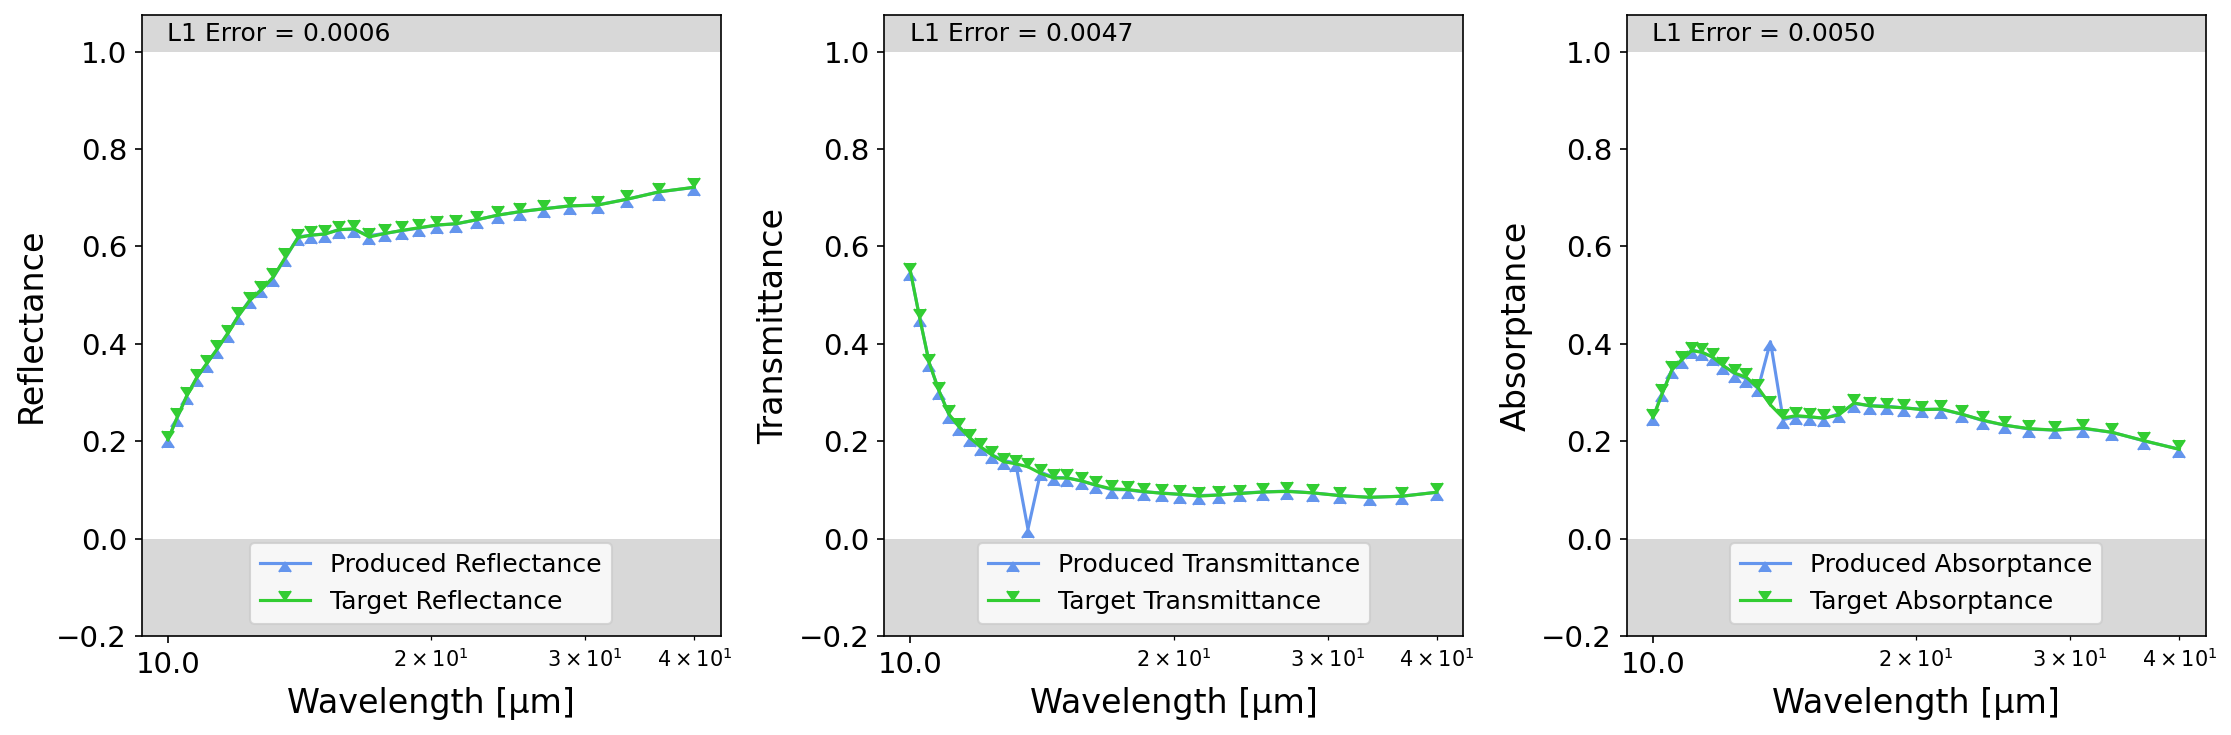

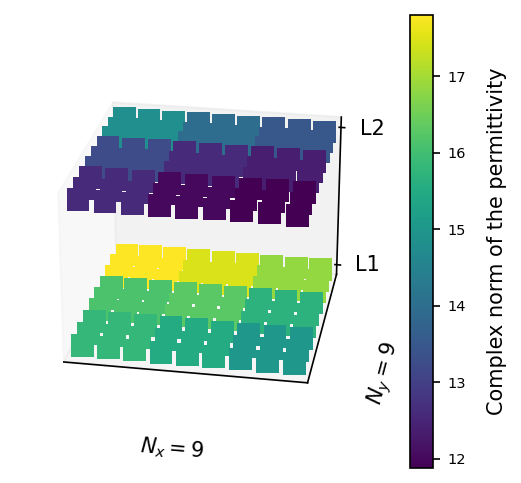

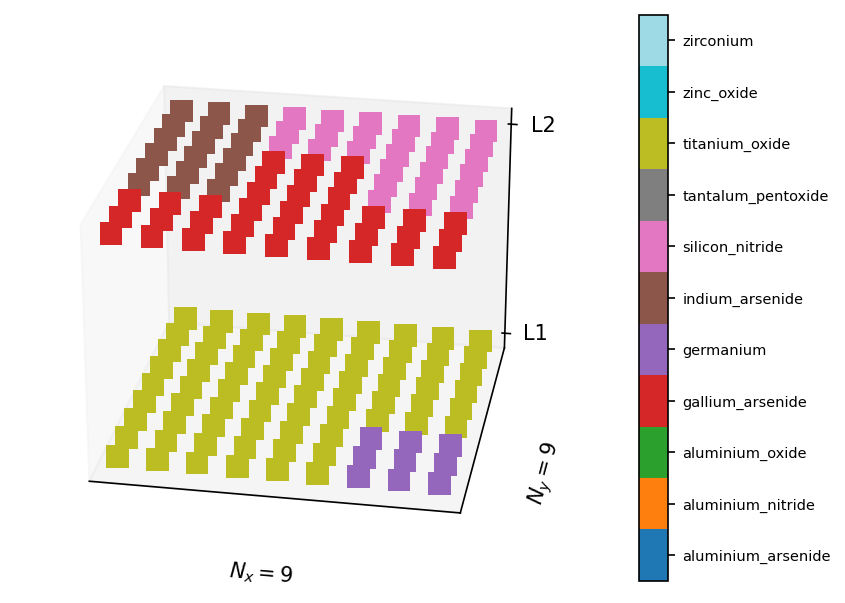

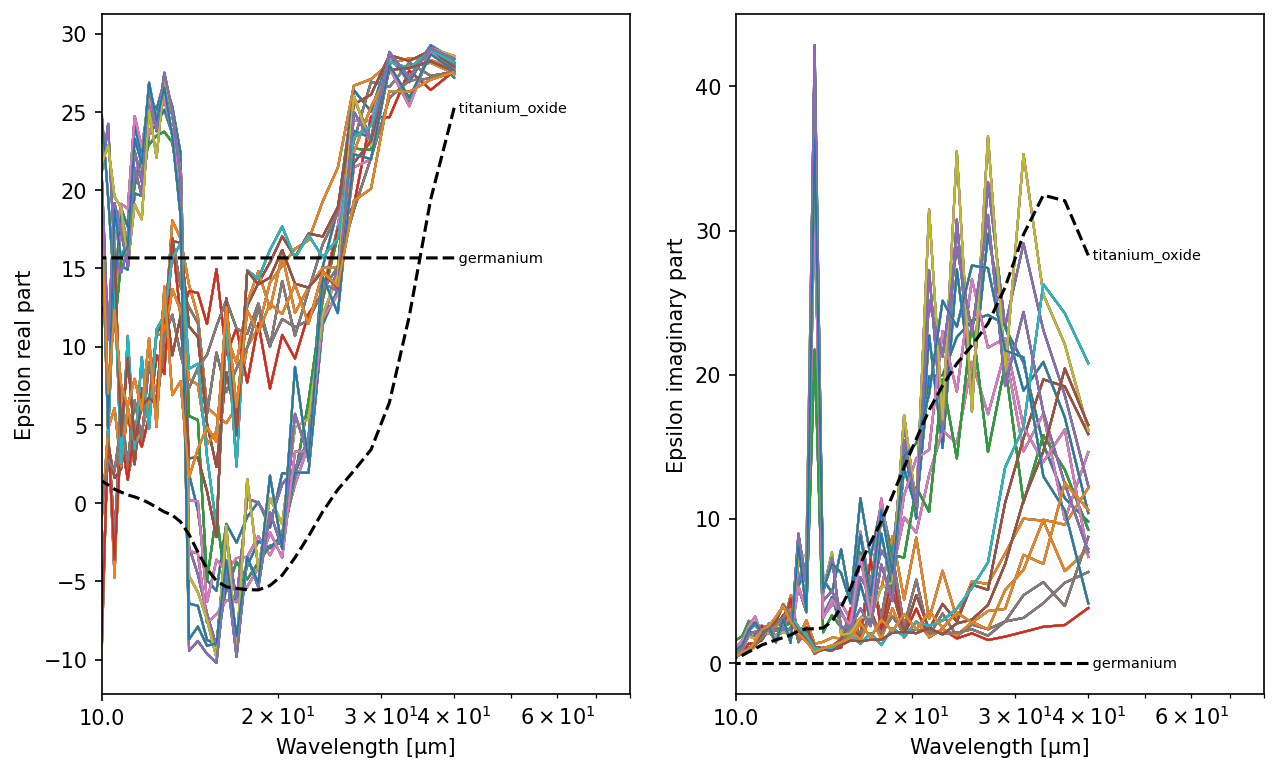

In [26]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_material_grid(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium"],legend=False)

In [27]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model
cfg.real_min_eps = -15.0
cfg.real_max_eps = 30.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 50.0

cfg.type = "classification" # Choose type as described above (for now still regression)
cfg.iterations = 2000 # Set number of training iterations (that is forward model evaluations) to perform

In [28]:
nidn.run_training(cfg);

18:34:42|NIDN-INFO| ###  New Best=0.0980 with SpectrumLoss=0.0934 ### L1=0.0934
18:34:42|NIDN-INFO| It=0     Loss=0.0980   |  weighted_avg=0.0980  |  SpectrumLoss=0.0934 | L1=0.0934
18:34:48|NIDN-INFO| It=5     Loss=0.0989   |  weighted_avg=0.1051  |  SpectrumLoss=0.0943 | L1=0.0943
18:34:49|NIDN-INFO| ###  New Best=0.0937 with SpectrumLoss=0.0891 ### L1=0.0891
18:34:52|NIDN-INFO| ###  New Best=0.0930 with SpectrumLoss=0.0884 ### L1=0.0884
18:34:53|NIDN-INFO| ###  New Best=0.0906 with SpectrumLoss=0.0861 ### L1=0.0861
18:34:53|NIDN-INFO| It=10    Loss=0.0906   |  weighted_avg=0.0997  |  SpectrumLoss=0.0861 | L1=0.0861
18:34:54|NIDN-INFO| ###  New Best=0.0878 with SpectrumLoss=0.0832 ### L1=0.0832
18:34:56|NIDN-INFO| ###  New Best=0.0849 with SpectrumLoss=0.0803 ### L1=0.0803
18:34:57|NIDN-INFO| ###  New Best=0.0816 with SpectrumLoss=0.0770 ### L1=0.0770
18:34:58|NIDN-INFO| ###  New Best=0.0779 with SpectrumLoss=0.0734 ### L1=0.0734
18:34:59|NIDN-INFO| ###  New Best=0.0734 with Spectrum

18:36:05|NIDN-INFO| ###  New Best=0.0125 with SpectrumLoss=0.0108 ### L1=0.0108
18:36:05|NIDN-INFO| It=75    Loss=0.0125   |  weighted_avg=0.0138  |  SpectrumLoss=0.0108 | L1=0.0108
18:36:07|NIDN-INFO| ###  New Best=0.0124 with SpectrumLoss=0.0107 ### L1=0.0107
18:36:09|NIDN-INFO| ###  New Best=0.0121 with SpectrumLoss=0.0104 ### L1=0.0104
18:36:10|NIDN-INFO| ###  New Best=0.0121 with SpectrumLoss=0.0103 ### L1=0.0103
18:36:10|NIDN-INFO| It=80    Loss=0.0121   |  weighted_avg=0.0132  |  SpectrumLoss=0.0103 | L1=0.0103
18:36:16|NIDN-INFO| ###  New Best=0.0121 with SpectrumLoss=0.0102 ### L1=0.0102
18:36:16|NIDN-INFO| It=85    Loss=0.0121   |  weighted_avg=0.0127  |  SpectrumLoss=0.0102 | L1=0.0102
18:36:19|NIDN-INFO| ###  New Best=0.0120 with SpectrumLoss=0.0101 ### L1=0.0101
18:36:21|NIDN-INFO| It=90    Loss=0.0121   |  weighted_avg=0.0125  |  SpectrumLoss=0.0102 | L1=0.0102
18:36:22|NIDN-INFO| ###  New Best=0.0120 with SpectrumLoss=0.0101 ### L1=0.0101
18:36:24|NIDN-INFO| ###  New Bes

18:38:56|NIDN-INFO| ###  New Best=0.0112 with SpectrumLoss=0.0094 ### L1=0.0094
18:38:59|NIDN-INFO| It=235   Loss=0.0112   |  weighted_avg=0.0114  |  SpectrumLoss=0.0094 | L1=0.0094
18:39:05|NIDN-INFO| ###  New Best=0.0112 with SpectrumLoss=0.0094 ### L1=0.0094
18:39:05|NIDN-INFO| It=240   Loss=0.0112   |  weighted_avg=0.0114  |  SpectrumLoss=0.0094 | L1=0.0094
18:39:10|NIDN-INFO| It=245   Loss=0.0114   |  weighted_avg=0.0114  |  SpectrumLoss=0.0096 | L1=0.0096
18:39:11|NIDN-INFO| ###  New Best=0.0112 with SpectrumLoss=0.0094 ### L1=0.0094
18:39:15|NIDN-INFO| It=250   Loss=0.0112   |  weighted_avg=0.0113  |  SpectrumLoss=0.0094 | L1=0.0094
18:39:16|NIDN-INFO| ###  New Best=0.0111 with SpectrumLoss=0.0093 ### L1=0.0093
18:39:17|NIDN-INFO| ###  New Best=0.0111 with SpectrumLoss=0.0093 ### L1=0.0093
18:39:18|NIDN-INFO| ###  New Best=0.0111 with SpectrumLoss=0.0093 ### L1=0.0093
18:39:21|NIDN-INFO| ###  New Best=0.0111 with SpectrumLoss=0.0093 ### L1=0.0093
18:39:21|NIDN-INFO| It=255   Los

18:42:08|NIDN-INFO| ###  New Best=0.0088 with SpectrumLoss=0.0075 ### L1=0.0075
18:42:10|NIDN-INFO| ###  New Best=0.0087 with SpectrumLoss=0.0074 ### L1=0.0074
18:42:12|NIDN-INFO| ###  New Best=0.0087 with SpectrumLoss=0.0074 ### L1=0.0074
18:42:12|NIDN-INFO| It=415   Loss=0.0087   |  weighted_avg=0.0090  |  SpectrumLoss=0.0074 | L1=0.0074
18:42:15|NIDN-INFO| ###  New Best=0.0087 with SpectrumLoss=0.0074 ### L1=0.0074
18:42:17|NIDN-INFO| ###  New Best=0.0086 with SpectrumLoss=0.0073 ### L1=0.0073
18:42:18|NIDN-INFO| It=420   Loss=0.0087   |  weighted_avg=0.0088  |  SpectrumLoss=0.0074 | L1=0.0074
18:42:19|NIDN-INFO| ###  New Best=0.0086 with SpectrumLoss=0.0073 ### L1=0.0073
18:42:21|NIDN-INFO| ###  New Best=0.0086 with SpectrumLoss=0.0073 ### L1=0.0073
18:42:23|NIDN-INFO| It=425   Loss=0.0086   |  weighted_avg=0.0087  |  SpectrumLoss=0.0073 | L1=0.0073
18:42:26|NIDN-INFO| ###  New Best=0.0085 with SpectrumLoss=0.0072 ### L1=0.0072
18:42:28|NIDN-INFO| ###  New Best=0.0085 with Spectrum

18:44:05|NIDN-INFO| It=520   Loss=0.0072   |  weighted_avg=0.0075  |  SpectrumLoss=0.0061 | L1=0.0061
18:44:08|NIDN-INFO| ###  New Best=0.0072 with SpectrumLoss=0.0061 ### L1=0.0061
18:44:09|NIDN-INFO| ###  New Best=0.0072 with SpectrumLoss=0.0061 ### L1=0.0061
18:44:10|NIDN-INFO| ###  New Best=0.0072 with SpectrumLoss=0.0061 ### L1=0.0061
18:44:10|NIDN-INFO| It=525   Loss=0.0072   |  weighted_avg=0.0074  |  SpectrumLoss=0.0061 | L1=0.0061
18:44:11|NIDN-INFO| ###  New Best=0.0072 with SpectrumLoss=0.0060 ### L1=0.0060
18:44:12|NIDN-INFO| ###  New Best=0.0072 with SpectrumLoss=0.0060 ### L1=0.0060
18:44:13|NIDN-INFO| ###  New Best=0.0072 with SpectrumLoss=0.0060 ### L1=0.0060
18:44:14|NIDN-INFO| ###  New Best=0.0071 with SpectrumLoss=0.0060 ### L1=0.0060
18:44:15|NIDN-INFO| ###  New Best=0.0071 with SpectrumLoss=0.0060 ### L1=0.0060
18:44:15|NIDN-INFO| It=530   Loss=0.0071   |  weighted_avg=0.0073  |  SpectrumLoss=0.0060 | L1=0.0060
18:44:16|NIDN-INFO| ###  New Best=0.0071 with Spectrum

18:46:10|NIDN-INFO| ###  New Best=0.0065 with SpectrumLoss=0.0056 ### L1=0.0056
18:46:12|NIDN-INFO| ###  New Best=0.0065 with SpectrumLoss=0.0056 ### L1=0.0056
18:46:13|NIDN-INFO| It=640   Loss=0.0065   |  weighted_avg=0.0066  |  SpectrumLoss=0.0056 | L1=0.0056
18:46:14|NIDN-INFO| ###  New Best=0.0065 with SpectrumLoss=0.0056 ### L1=0.0056
18:46:16|NIDN-INFO| ###  New Best=0.0064 with SpectrumLoss=0.0055 ### L1=0.0055
18:46:18|NIDN-INFO| It=645   Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0055 | L1=0.0055
18:46:19|NIDN-INFO| ###  New Best=0.0064 with SpectrumLoss=0.0055 ### L1=0.0055
18:46:23|NIDN-INFO| ###  New Best=0.0064 with SpectrumLoss=0.0055 ### L1=0.0055
18:46:24|NIDN-INFO| It=650   Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
18:46:26|NIDN-INFO| ###  New Best=0.0063 with SpectrumLoss=0.0054 ### L1=0.0054
18:46:29|NIDN-INFO| It=655   Loss=0.0063   |  weighted_avg=0.0064  |  SpectrumLoss=0.0054 | L1=0.0054
18:46:32|NIDN-INFO| ###  New Bes

18:48:33|NIDN-INFO| ###  New Best=0.0059 with SpectrumLoss=0.0051 ### L1=0.0051
18:48:34|NIDN-INFO| It=770   Loss=0.0059   |  weighted_avg=0.0059  |  SpectrumLoss=0.0051 | L1=0.0051
18:48:38|NIDN-INFO| ###  New Best=0.0059 with SpectrumLoss=0.0051 ### L1=0.0051
18:48:40|NIDN-INFO| It=775   Loss=0.0059   |  weighted_avg=0.0059  |  SpectrumLoss=0.0051 | L1=0.0051
18:48:41|NIDN-INFO| ###  New Best=0.0059 with SpectrumLoss=0.0051 ### L1=0.0051
18:48:47|NIDN-INFO| ###  New Best=0.0058 with SpectrumLoss=0.0051 ### L1=0.0051
18:48:47|NIDN-INFO| It=780   Loss=0.0058   |  weighted_avg=0.0059  |  SpectrumLoss=0.0051 | L1=0.0051
18:48:50|NIDN-INFO| ###  New Best=0.0058 with SpectrumLoss=0.0051 ### L1=0.0051
18:48:52|NIDN-INFO| ###  New Best=0.0058 with SpectrumLoss=0.0051 ### L1=0.0051
18:48:52|NIDN-INFO| It=785   Loss=0.0058   |  weighted_avg=0.0059  |  SpectrumLoss=0.0051 | L1=0.0051
18:48:55|NIDN-INFO| ###  New Best=0.0058 with SpectrumLoss=0.0050 ### L1=0.0050
18:48:56|NIDN-INFO| ###  New Bes

18:51:02|NIDN-INFO| ###  New Best=0.0056 with SpectrumLoss=0.0048 ### L1=0.0048
18:51:06|NIDN-INFO| It=905   Loss=0.0056   |  weighted_avg=0.0057  |  SpectrumLoss=0.0049 | L1=0.0049
18:51:08|NIDN-INFO| ###  New Best=0.0056 with SpectrumLoss=0.0048 ### L1=0.0048
18:51:12|NIDN-INFO| It=910   Loss=0.0056   |  weighted_avg=0.0057  |  SpectrumLoss=0.0048 | L1=0.0048
18:51:13|NIDN-INFO| ###  New Best=0.0056 with SpectrumLoss=0.0048 ### L1=0.0048
18:51:16|NIDN-INFO| ###  New Best=0.0056 with SpectrumLoss=0.0048 ### L1=0.0048
18:51:17|NIDN-INFO| It=915   Loss=0.0061   |  weighted_avg=0.0057  |  SpectrumLoss=0.0053 | L1=0.0053
18:51:22|NIDN-INFO| It=920   Loss=0.0061   |  weighted_avg=0.0058  |  SpectrumLoss=0.0053 | L1=0.0053
18:51:28|NIDN-INFO| It=925   Loss=0.0061   |  weighted_avg=0.0058  |  SpectrumLoss=0.0053 | L1=0.0053
18:51:33|NIDN-INFO| It=930   Loss=0.0060   |  weighted_avg=0.0058  |  SpectrumLoss=0.0052 | L1=0.0052
18:51:39|NIDN-INFO| It=935   Loss=0.0061   |  weighted_avg=0.0059  |

18:56:35|NIDN-INFO| It=1210  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
18:56:41|NIDN-INFO| It=1215  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
18:56:46|NIDN-INFO| It=1220  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
18:56:51|NIDN-INFO| It=1225  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
18:56:57|NIDN-INFO| It=1230  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
18:57:02|NIDN-INFO| It=1235  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
18:57:07|NIDN-INFO| It=1240  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
18:57:13|NIDN-INFO| It=1245  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
18:57:18|NIDN-INFO| It=1250  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
18:57:23|NIDN-INFO| It=1255  Loss=0.0067   |  weighted_avg=0.0067  |  SpectrumLoss

Epoch  1416: reducing learning rate of group 0 to 5.2800e-05.


19:00:20|NIDN-INFO| It=1420  Loss=0.0066   |  weighted_avg=0.0067  |  SpectrumLoss=0.0059 | L1=0.0059
19:00:25|NIDN-INFO| It=1425  Loss=0.0066   |  weighted_avg=0.0066  |  SpectrumLoss=0.0059 | L1=0.0059
19:00:31|NIDN-INFO| It=1430  Loss=0.0066   |  weighted_avg=0.0066  |  SpectrumLoss=0.0059 | L1=0.0059
19:00:36|NIDN-INFO| It=1435  Loss=0.0066   |  weighted_avg=0.0066  |  SpectrumLoss=0.0059 | L1=0.0059
19:00:41|NIDN-INFO| It=1440  Loss=0.0066   |  weighted_avg=0.0066  |  SpectrumLoss=0.0059 | L1=0.0059
19:00:47|NIDN-INFO| It=1445  Loss=0.0066   |  weighted_avg=0.0066  |  SpectrumLoss=0.0059 | L1=0.0059
19:00:52|NIDN-INFO| It=1450  Loss=0.0066   |  weighted_avg=0.0066  |  SpectrumLoss=0.0059 | L1=0.0059
19:00:58|NIDN-INFO| It=1455  Loss=0.0066   |  weighted_avg=0.0066  |  SpectrumLoss=0.0059 | L1=0.0059
19:01:03|NIDN-INFO| It=1460  Loss=0.0066   |  weighted_avg=0.0066  |  SpectrumLoss=0.0059 | L1=0.0059
19:01:08|NIDN-INFO| It=1465  Loss=0.0066   |  weighted_avg=0.0066  |  SpectrumLoss

19:06:11|NIDN-INFO| It=1745  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
19:06:16|NIDN-INFO| It=1750  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
19:06:22|NIDN-INFO| It=1755  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
19:06:27|NIDN-INFO| It=1760  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
19:06:33|NIDN-INFO| It=1765  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
19:06:38|NIDN-INFO| It=1770  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
19:06:43|NIDN-INFO| It=1775  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
19:06:49|NIDN-INFO| It=1780  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
19:06:54|NIDN-INFO| It=1785  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss=0.0056 | L1=0.0056
19:07:00|NIDN-INFO| It=1790  Loss=0.0065   |  weighted_avg=0.0065  |  SpectrumLoss

Epoch  1917: reducing learning rate of group 0 to 3.4848e-05.


19:09:21|NIDN-INFO| It=1920  Loss=0.0062   |  weighted_avg=0.0062  |  SpectrumLoss=0.0053 | L1=0.0053
19:09:26|NIDN-INFO| It=1925  Loss=0.0062   |  weighted_avg=0.0062  |  SpectrumLoss=0.0053 | L1=0.0053
19:09:31|NIDN-INFO| It=1930  Loss=0.0062   |  weighted_avg=0.0062  |  SpectrumLoss=0.0054 | L1=0.0054
19:09:37|NIDN-INFO| It=1935  Loss=0.0062   |  weighted_avg=0.0062  |  SpectrumLoss=0.0053 | L1=0.0053
19:09:42|NIDN-INFO| It=1940  Loss=0.0062   |  weighted_avg=0.0062  |  SpectrumLoss=0.0053 | L1=0.0053
19:09:48|NIDN-INFO| It=1945  Loss=0.0062   |  weighted_avg=0.0062  |  SpectrumLoss=0.0054 | L1=0.0054
19:09:53|NIDN-INFO| It=1950  Loss=0.0061   |  weighted_avg=0.0062  |  SpectrumLoss=0.0053 | L1=0.0053
19:09:58|NIDN-INFO| It=1955  Loss=0.0062   |  weighted_avg=0.0062  |  SpectrumLoss=0.0053 | L1=0.0053
19:10:04|NIDN-INFO| It=1960  Loss=0.0061   |  weighted_avg=0.0062  |  SpectrumLoss=0.0053 | L1=0.0053
19:10:09|NIDN-INFO| It=1965  Loss=0.0061   |  weighted_avg=0.0062  |  SpectrumLoss

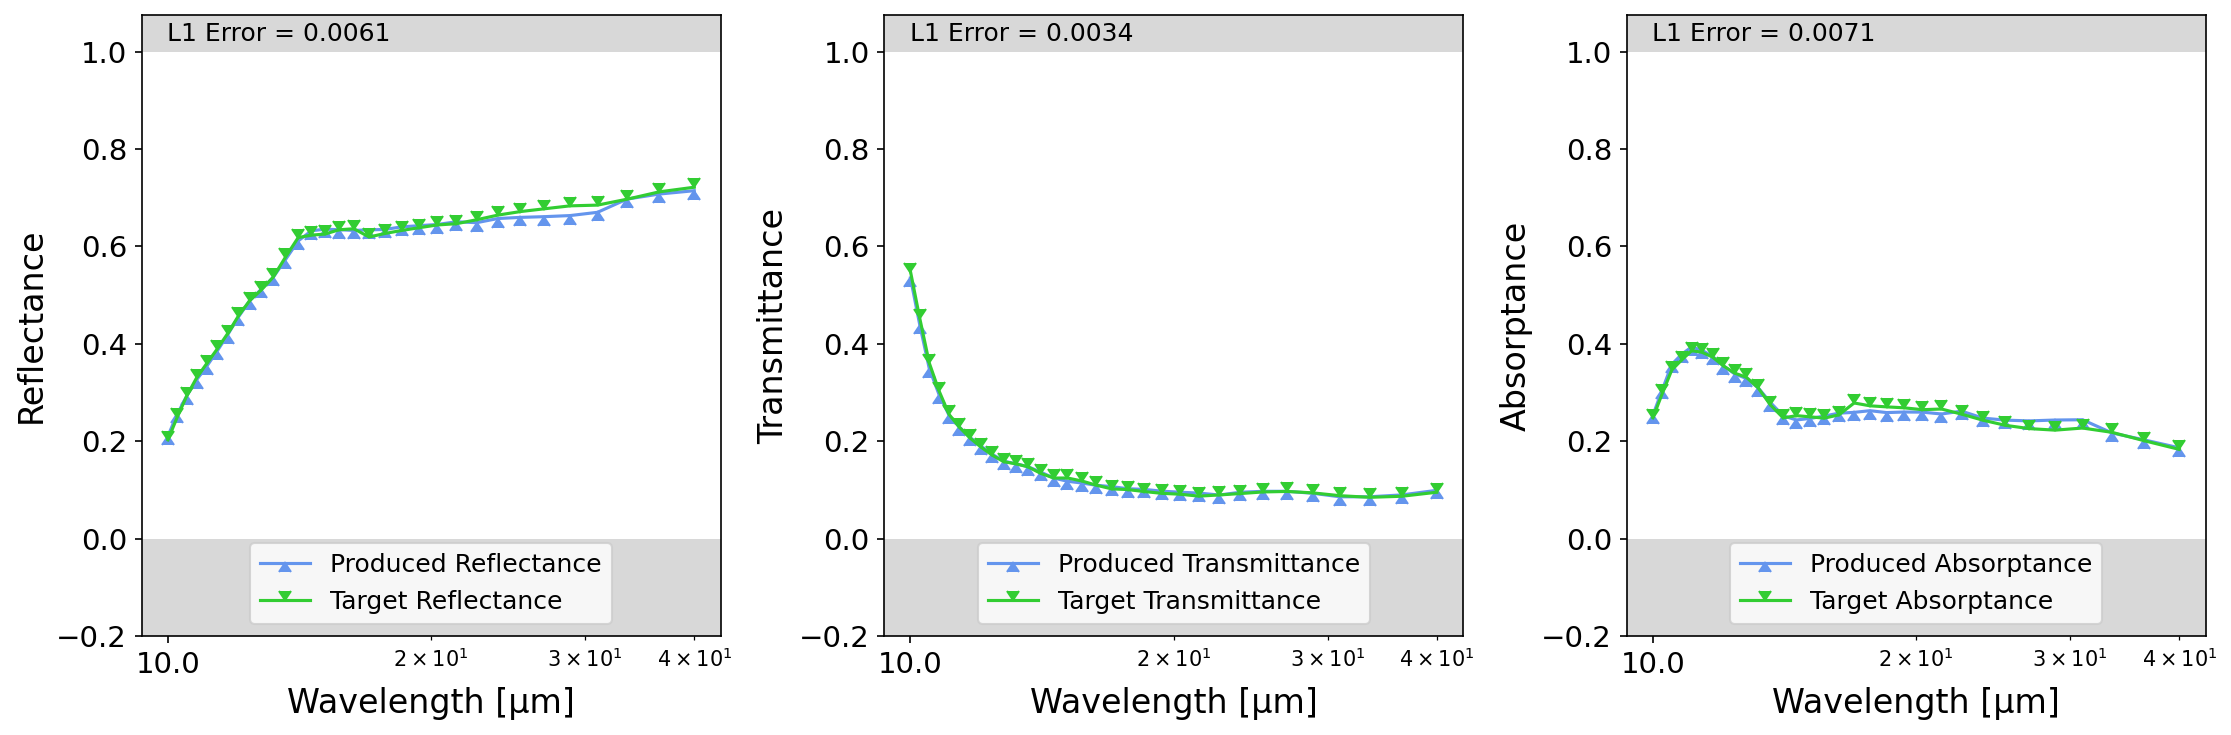

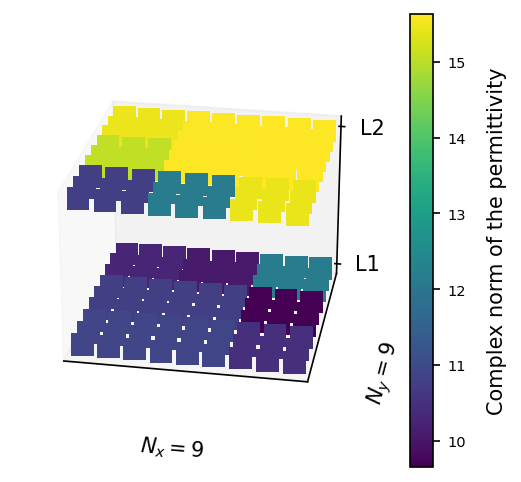

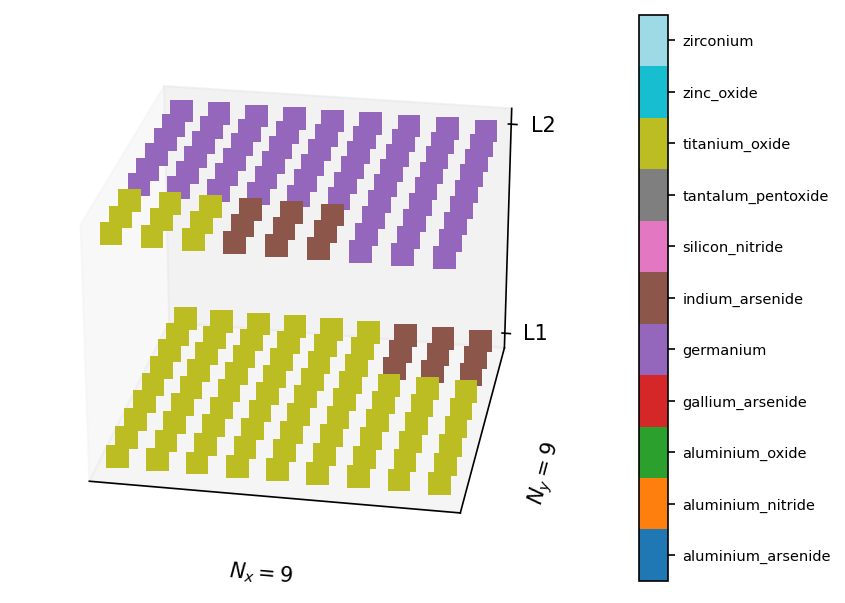

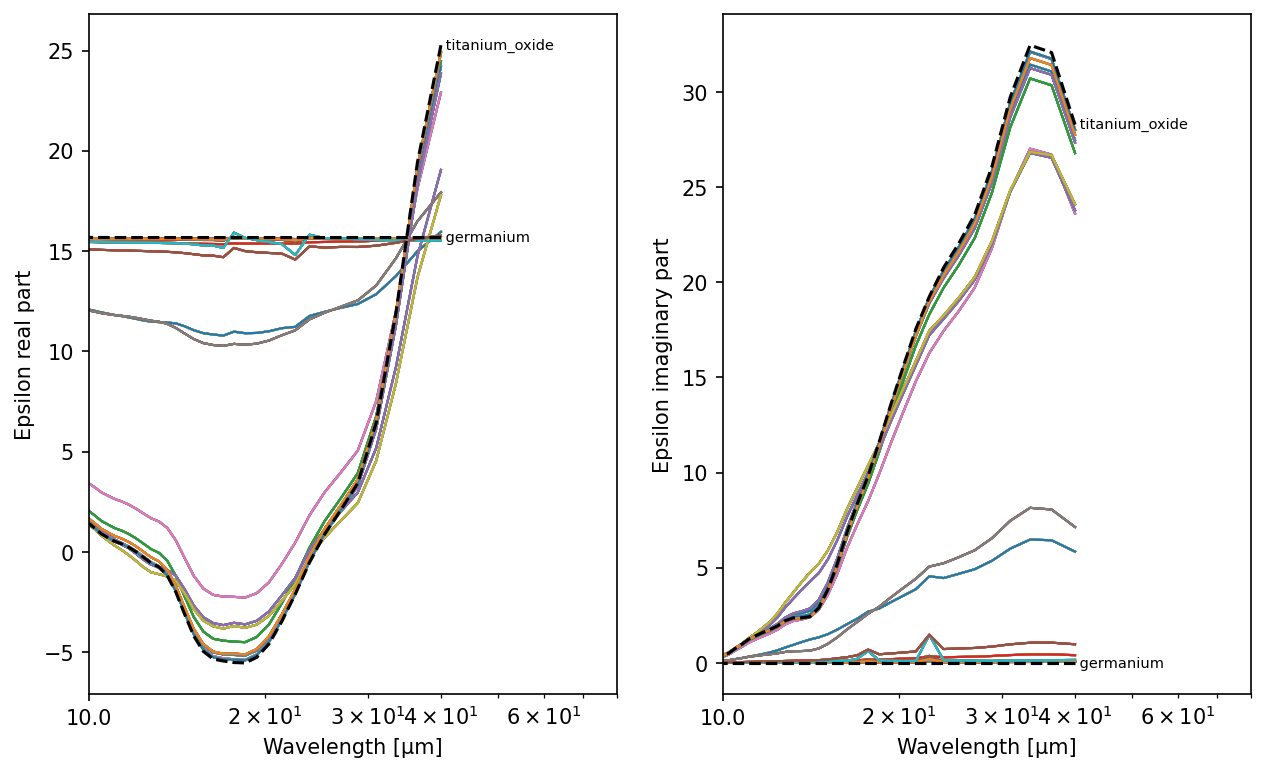

In [29]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_material_grid(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium"],legend=False)